# EasyVisa Project


## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [256]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
)


# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import metrics

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier


#
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [300]:
dfr = pd.read_csv("EasyVisa.csv")

<IPython.core.display.Javascript object>

In [301]:
dfr

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


<IPython.core.display.Javascript object>

## Exploratory Data Analysis (EDA)



In [302]:
dfr.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


<IPython.core.display.Javascript object>

In [303]:
dfr[dfr.duplicated()].count()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

<IPython.core.display.Javascript object>

Comment: No duplicated rows!

Comment:Dropping the "case id" column.

In [304]:
dfr.drop(["case_id"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [305]:
dfr

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...
25475,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


<IPython.core.display.Javascript object>

In [306]:
for col in dfr.columns:
    print("Number of unique values in ", col, len(dfr[col].unique()))

Number of unique values in  continent 6
Number of unique values in  education_of_employee 4
Number of unique values in  has_job_experience 2
Number of unique values in  requires_job_training 2
Number of unique values in  no_of_employees 7105
Number of unique values in  yr_of_estab 199
Number of unique values in  region_of_employment 5
Number of unique values in  prevailing_wage 25454
Number of unique values in  unit_of_wage 4
Number of unique values in  full_time_position 2
Number of unique values in  case_status 2


<IPython.core.display.Javascript object>

Comment: "Sanity check" for different values.

In [307]:
nulldata = dfr.isnull().any(axis=1)

<IPython.core.display.Javascript object>

In [308]:
for n in nulldata.value_counts().sort_index().index:
    if n > 0:
        print(f"For the rows with exactly {n} missing values, NAs are found in:")
        n_miss_per_col = dfr[nulldata == n].isnull().sum()
        print(n_miss_per_col[n_miss_per_col > 0])
        print("\n\n")

<IPython.core.display.Javascript object>

In [309]:
##check count of NAN
count_nan = len(dfr) - dfr.count()
print(count_nan)

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64


<IPython.core.display.Javascript object>

Comment:No missing values. 

In [310]:
dfr["unit_of_wage"].unique()

array(['Hour', 'Year', 'Week', 'Month'], dtype=object)

<IPython.core.display.Javascript object>

Summary before vizualizations:

1.Missing values: There are no missing values. So no imputing needed.

2.Outliers: Decision trees are not sensitive to outliers. 
So we do not have to worry about it forthe model of the Decision Tree. 
I will reconsider if the model does not work.
The sigmoid function tapers the outliers. 
But the presence of extreme outliers may somehow affect the performance of the model and lowering the performance. 

3.No scaling needed as decision trees are not sensitive. 

4.No duplicate rows.

5. Case_id column removed. 


Further steps:

1. ETA
1. Encoding variables

2. Decision tree can handle multicollinearity so I will skip this step to see if themodels work.  (Multicolinearity could be used to remove fetures and make hyperparameter tuning faster)

In [325]:
case1 = dfr["unit_of_wage"].str.contains("Hour")
case2 = dfr["unit_of_wage"].str.contains("Year")
case3 = dfr["unit_of_wage"].str.contains("Week")
case4 = dfr["unit_of_wage"].str.contains("Month")
dfr["wage_fin"] = np.select(
    [case1, case2, case3, case4],
    [
        dfr["prevailing_wage"] * 7 * 5 * 43,
        dfr["prevailing_wage"],
        dfr["prevailing_wage"] * 43,
        dfr["prevailing_wage"] * 12,
    ],
)

<IPython.core.display.Javascript object>

In [326]:
dfr.describe()

,no_of_employees,yr_of_estab,prevailing_wage,wage_fin
count,25480.000000,25480.000000,25480.000000,2.548000e+04
mean,5667.043210,1979.409929,74455.814592,1.689866e+05
std,22877.928848,42.366929,52815.942327,4.656653e+05
min,-26.000000,1800.000000,2.136700,1.000000e+02
25%,1022.000000,1976.000000,34015.480000,4.704956e+04
50%,2109.000000,1997.000000,70308.210000,8.262798e+04
75%,3504.000000,2005.000000,107735.512500,1.245254e+05
max,602069.000000,2016.000000,319210.270000,1.204757e+07


<IPython.core.display.Javascript object>

In [327]:
dfr.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,wage_fin
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,891265.3645
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,83425.6500
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,122996.8600
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,83434.0300
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,149907.3900


<IPython.core.display.Javascript object>

In [328]:
dfr.tail()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,wage_fin
25475,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified,77092.57
25476,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified,279174.79
25477,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified,146298.85
25478,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified,86154.77
25479,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified,70876.91


<IPython.core.display.Javascript object>

In [315]:
# customized boxplot+histogram with mean and median values
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="yellow"
    )  
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    ) 
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  



<IPython.core.display.Javascript object>

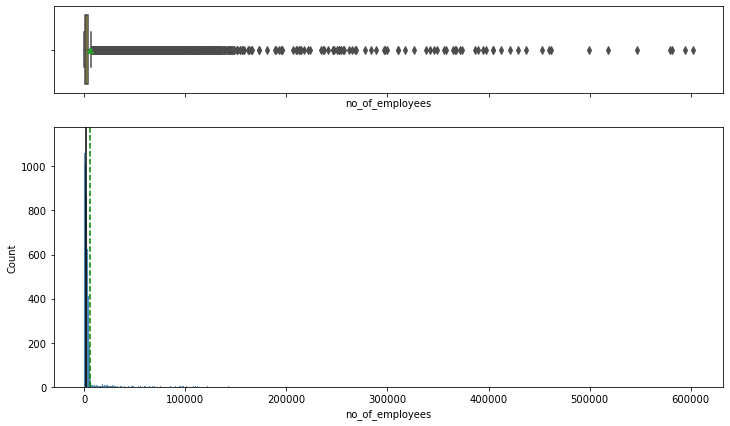

<IPython.core.display.Javascript object>

In [318]:
histogram_boxplot(dfr, "no_of_employees")

It might be useful to bin this column into 0-99,100-999,1000-Max

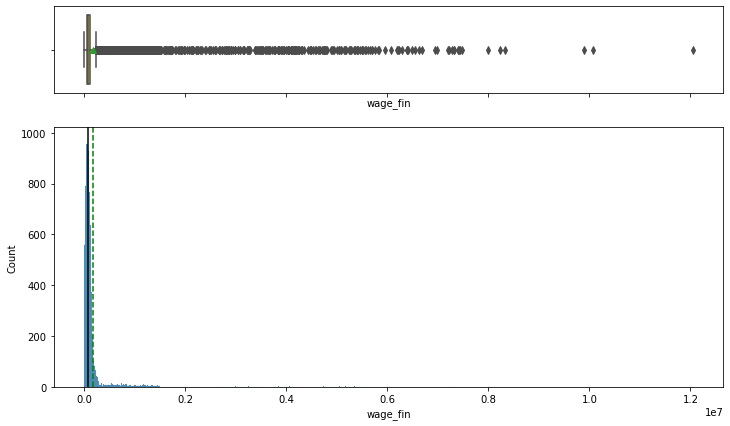

<IPython.core.display.Javascript object>

In [329]:
histogram_boxplot(dfr, "wage_fin")

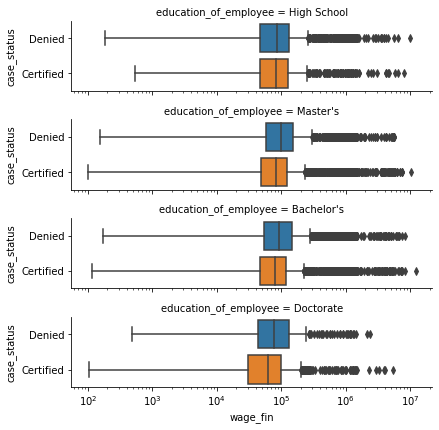

<IPython.core.display.Javascript object>

In [330]:
g = sns.catplot(
    x="wage_fin",
    y="case_status",
    row="education_of_employee",
    kind="box",
    orient="h",
    height=1.5,
    aspect=4,
    data=dfr,
)
g.set(xscale="log")

Comment: Log scale plots for yearly wage (calculated) do not show different values or characteristics of distribtions for th different levels of educaiton and  certified or denied visas.

BUT the salaries for certified visas are never larger than the denied.they are slightly lower for BS, Phd, MS education level.  

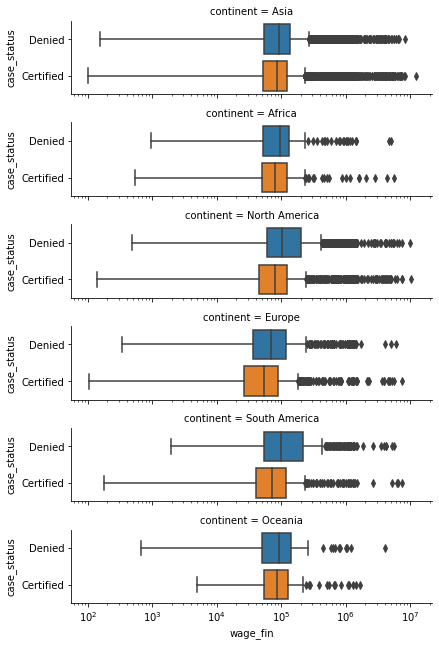

<IPython.core.display.Javascript object>

In [331]:
g = sns.catplot(
    x="wage_fin",
    y="case_status",
    row="continent",
    kind="box",
    orient="h",
    height=1.5,
    aspect=4,
    data=dfr,
)
g.set(xscale="log")

Comment: Similarly like for education when we look at the continents the certified visas correspond to salaries that on average are not larger than the denied. For Europe, North America, Oceania and South America they are lower.  For AfricaAsia the distributins look very similar. 

In [335]:
df = dfr[(dfr["no_of_employees"] > 0)]

<IPython.core.display.Javascript object>

Comment: Selectig rows with number o employees larger than zero (the company with zero or negative number of employees does not make sens)

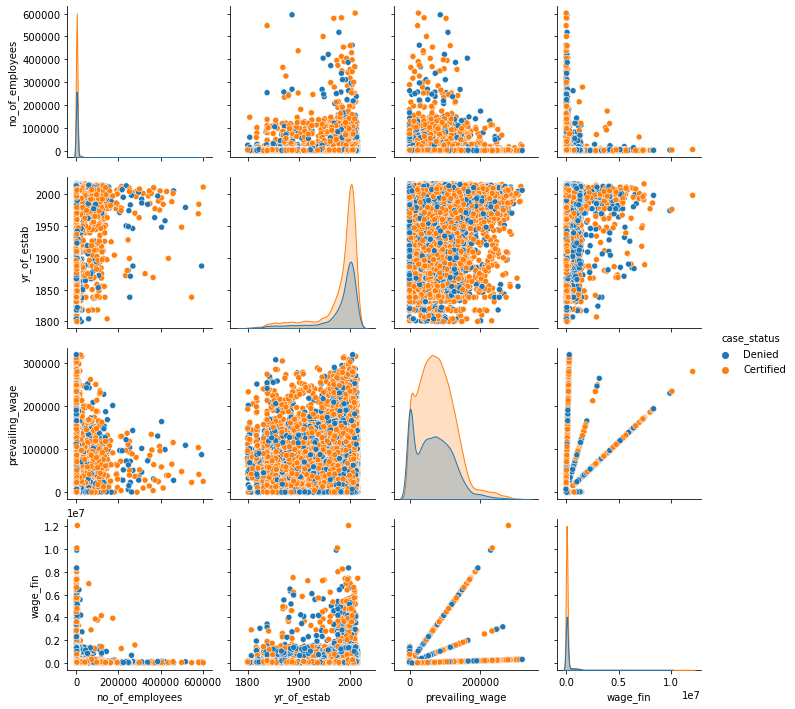

<IPython.core.display.Javascript object>

In [334]:
sns.pairplot(df, "case_status")

<AxesSubplot:xlabel='yr_of_estab', ylabel='Count'>

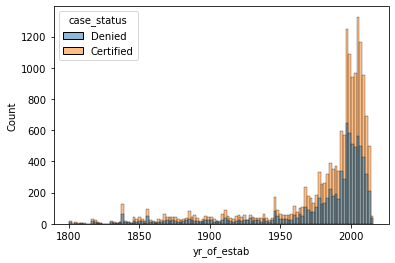

<IPython.core.display.Javascript object>

In [336]:
sns.histplot(
    data=df, x="yr_of_estab", hue="case_status", stat="count",
)

In [338]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage,wage_fin
count,25447.000000,25447.000000,25447.000000,2.544700e+04
mean,5674.415334,1979.394506,74468.281479,1.690496e+05
std,22891.842245,42.385932,52822.177370,4.659195e+05
min,12.000000,1800.000000,2.136700,1.000000e+02
25%,1025.000000,1976.000000,34039.210000,4.707838e+04
50%,2112.000000,1997.000000,70312.500000,8.262273e+04
75%,3506.500000,2005.000000,107739.505000,1.245254e+05
max,602069.000000,2016.000000,319210.270000,1.204757e+07


<IPython.core.display.Javascript object>

Removing the negative number of employees rows did not change the statsitics.

In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25447 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25447 non-null  object 
 1   education_of_employee  25447 non-null  object 
 2   has_job_experience     25447 non-null  object 
 3   requires_job_training  25447 non-null  object 
 4   no_of_employees        25447 non-null  int64  
 5   yr_of_estab            25447 non-null  int64  
 6   region_of_employment   25447 non-null  object 
 7   prevailing_wage        25447 non-null  float64
 8   unit_of_wage           25447 non-null  object 
 9   full_time_position     25447 non-null  object 
 10  case_status            25447 non-null  object 
 11  wage_fin               25447 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 2.5+ MB


<IPython.core.display.Javascript object>

# EDA

**Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

## 1 Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

<AxesSubplot:xlabel='education_of_employee', ylabel='Count'>

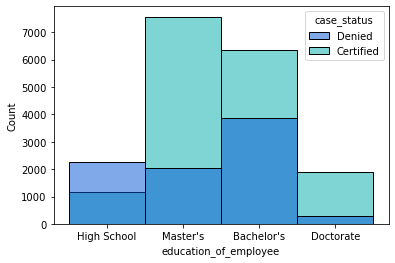

<IPython.core.display.Javascript object>

In [340]:
sns.histplot(
    data=df,
    x="education_of_employee",
    hue="case_status",
    palette="winter",
    stat="count",
)

Comment:Relatively more cases certified visa for Master BS and PhD education

In [341]:
deny = df[df["case_status"] == "Denied"]

<IPython.core.display.Javascript object>

In [627]:
certify = df[df["case_status"] == "Certified"]

<IPython.core.display.Javascript object>

I have split the data into 2 groups-one with denied visa one with certified visa

In [343]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

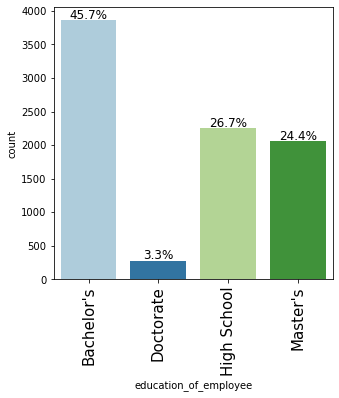

<IPython.core.display.Javascript object>

In [628]:
labeled_barplot(deny, "education_of_employee", perc=True, n=None)

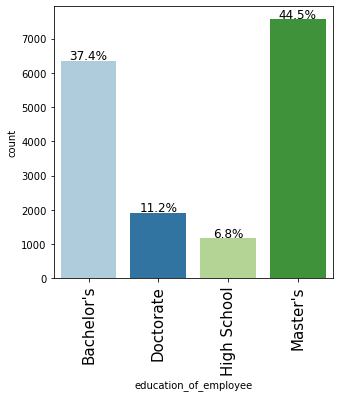

<IPython.core.display.Javascript object>

In [345]:
labeled_barplot(certify, "education_of_employee", perc=True, n=None)

I separate the  original dataset into 4 different groups with different education level.

In [346]:
bach = df[df["education_of_employee"] == "Bachelor's"]

<IPython.core.display.Javascript object>

In [347]:
mast = df[df["education_of_employee"] == "Master's"]

<IPython.core.display.Javascript object>

In [348]:
dr = df[df["education_of_employee"] == "Doctorate"]

<IPython.core.display.Javascript object>

In [349]:
hs = df[df["education_of_employee"] == "High School"]

<IPython.core.display.Javascript object>

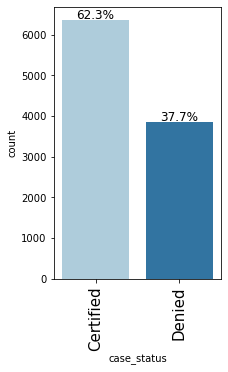

<IPython.core.display.Javascript object>

In [629]:
labeled_barplot(bach, "case_status", perc=True, n=None)

62.3% applicats with BS get he visa certified.

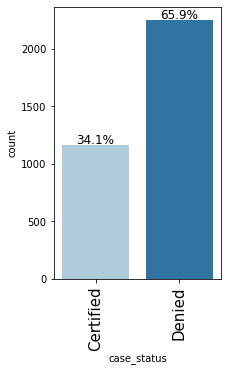

<IPython.core.display.Javascript object>

In [630]:
labeled_barplot(hs, "case_status", perc=True, n=None)

65.9% of applicants with HS education level have their visa denied.

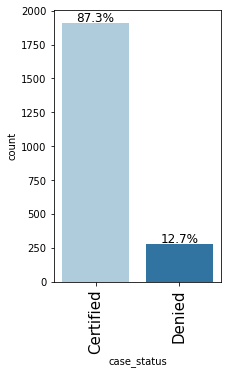

<IPython.core.display.Javascript object>

In [631]:
labeled_barplot(dr, "case_status", perc=True, n=None)

87.3% of applicants with PhD  get their visa certified. It is the highest percentage.

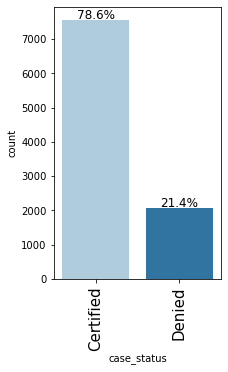

<IPython.core.display.Javascript object>

In [632]:
labeled_barplot(mast, "case_status", perc=True, n=None)

78.6% of applicants with Master degree have their visa cetified. 

## Answer:  Yes the education plays a role.The percentage of denied cases for HS, BS, MS and PhD are respectively 65.9%, 37.7%, 21.4%, 12.7%. So the number of denied cases is inversely proportional to the length of education

In [354]:
hs.describe()

,no_of_employees,yr_of_estab,prevailing_wage,wage_fin
count,3416.000000,3416.000000,3416.000000,3.416000e+03
mean,4971.380269,1978.357728,71598.598186,1.812494e+05
std,19287.612458,43.505530,53856.559059,4.594355e+05
min,12.000000,1800.000000,2.956100,1.818700e+02
25%,945.000000,1975.000000,28792.200000,4.721568e+04
50%,2058.000000,1997.000000,66313.980000,8.429576e+04
75%,3429.500000,2004.000000,106435.580000,1.303010e+05
max,517884.000000,2016.000000,319210.270000,9.887880e+06


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='case_status'>

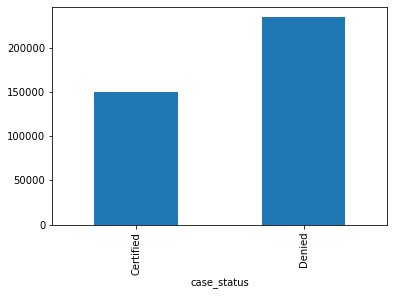

<IPython.core.display.Javascript object>

In [355]:
bach.groupby("case_status")["wage_fin"].mean().plot(kind="bar")

<AxesSubplot:xlabel='case_status'>

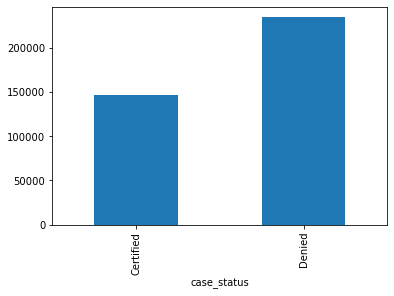

<IPython.core.display.Javascript object>

In [356]:
mast.groupby("case_status")["wage_fin"].mean().plot(kind="bar")

<AxesSubplot:xlabel='case_status'>

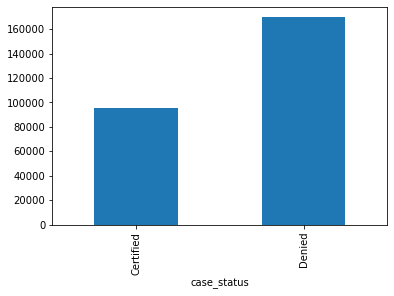

<IPython.core.display.Javascript object>

In [357]:
dr.groupby("case_status")["wage_fin"].mean().plot(kind="bar")

<AxesSubplot:xlabel='case_status'>

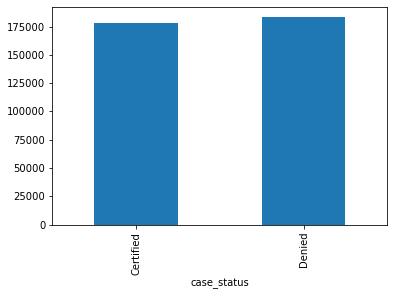

<IPython.core.display.Javascript object>

In [358]:
hs.groupby("case_status")["wage_fin"].mean().plot(kind="bar")

Comment: For High School graduates there is no big difference in average salary between denied and dertified cases.For the BS, MS, PhD - the average salary for denied cases is significantly higher. 

## 2. How does the visa status vary across different continents?

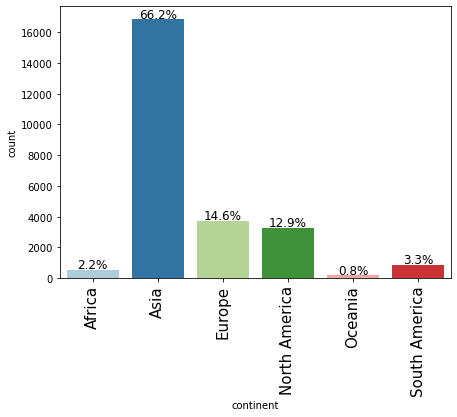

<IPython.core.display.Javascript object>

In [359]:
labeled_barplot(df, "continent", perc=True, n=None)

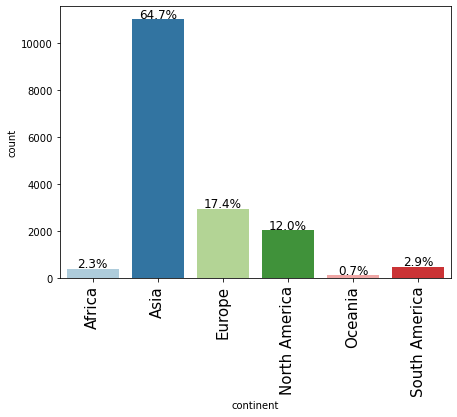

<IPython.core.display.Javascript object>

In [360]:
labeled_barplot(certify, "continent", perc=True, n=None)

## Answer: Majority of cretified visas is for candidates from Asia 64.7% then Europe 17.4%. 

In [361]:
AF = df[df["continent"] == "Africa"]

<IPython.core.display.Javascript object>

In [362]:
AS = df[df["continent"] == "Asia"]

<IPython.core.display.Javascript object>

In [363]:
EU = df[df["continent"] == "Europe"]

<IPython.core.display.Javascript object>

In [364]:
NAM = df[df["continent"] == "North America"]

<IPython.core.display.Javascript object>

In [365]:
SAM = df[df["continent"] == "South America"]

<IPython.core.display.Javascript object>

In [366]:
OC = df[df["continent"] == "Oceania"]

<IPython.core.display.Javascript object>

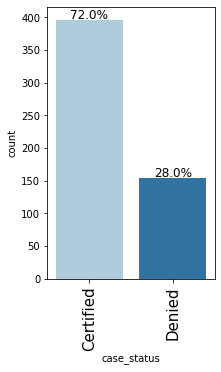

<IPython.core.display.Javascript object>

In [367]:
labeled_barplot(AF, "case_status", perc=True, n=None)

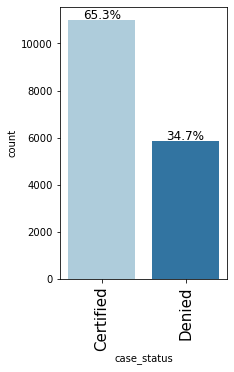

<IPython.core.display.Javascript object>

In [368]:
labeled_barplot(AS, "case_status", perc=True, n=None)

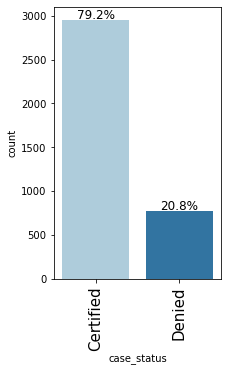

<IPython.core.display.Javascript object>

In [369]:
labeled_barplot(EU, "case_status", perc=True, n=None)

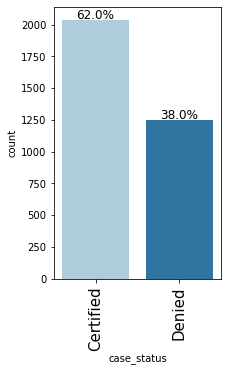

<IPython.core.display.Javascript object>

In [370]:
labeled_barplot(NAM, "case_status", perc=True, n=None)

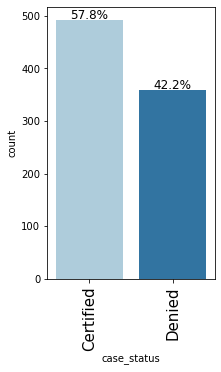

<IPython.core.display.Javascript object>

In [371]:
labeled_barplot(SAM, "case_status", perc=True, n=None)



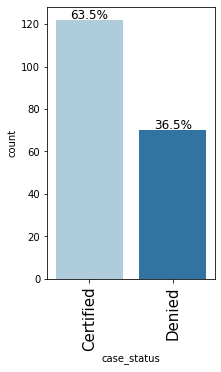

<IPython.core.display.Javascript object>

In [372]:
labeled_barplot(OC, "case_status", perc=True, n=None)

## Answer:Smallest denied percentage is for visa from Europe (1/5 th). Then Africa Asia and Oceania, North America ans South America.

## 3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 

case_status         Certified  Denied    All
has_job_experience                          
All                     17001    8446  25447
N                        5986    4675  10661
Y                       11015    3771  14786
------------------------------------------------------------------------------------------------------------------------


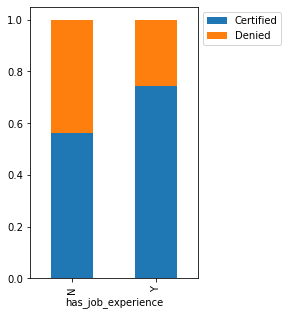

<IPython.core.display.Javascript object>

In [611]:
stacked_barplot(df, "has_job_experience", "case_status")

## Answer: Job experience has influence on the visas certifcation
.

## 4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 

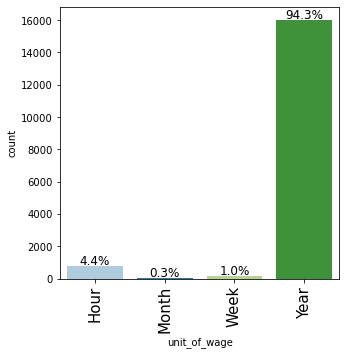

<IPython.core.display.Javascript object>

In [376]:
labeled_barplot(certify, "unit_of_wage", perc=True, n=None)

94.3% of certified visa is for yearly wage applicants.

## Answer: Yearly wage unit applications is most likely to be certified with visa.

## 5.The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

<AxesSubplot:xlabel='case_status', ylabel='prevailing_wage'>

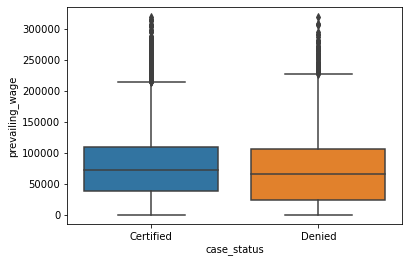

<IPython.core.display.Javascript object>

In [613]:
sns.boxplot(x="case_status", y="prevailing_wage", data=df)



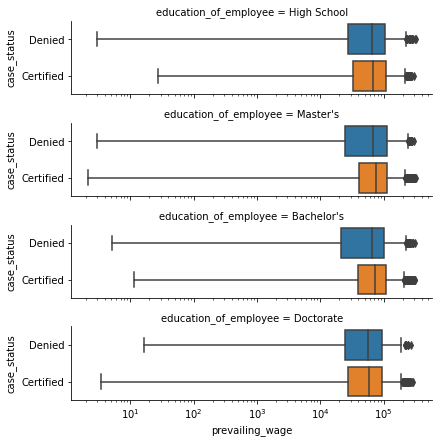

<IPython.core.display.Javascript object>

In [614]:
g = sns.catplot(
    x="prevailing_wage",
    y="case_status",
    row="education_of_employee",
    kind="box",
    orient="h",
    height=1.5,
    aspect=4,
    data=dfr,
)
g.set(xscale="log")

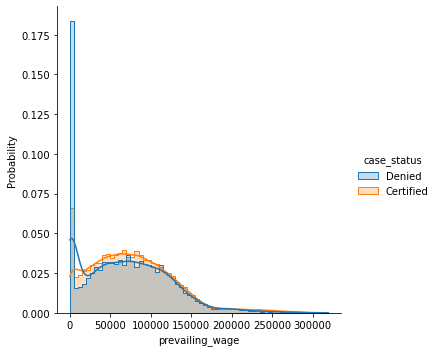

<IPython.core.display.Javascript object>

In [378]:
sns.displot(
    df,
    x="prevailing_wage",
    hue="case_status",
    stat="probability",
    kde=True,
    common_norm=False,
    element="step",
)

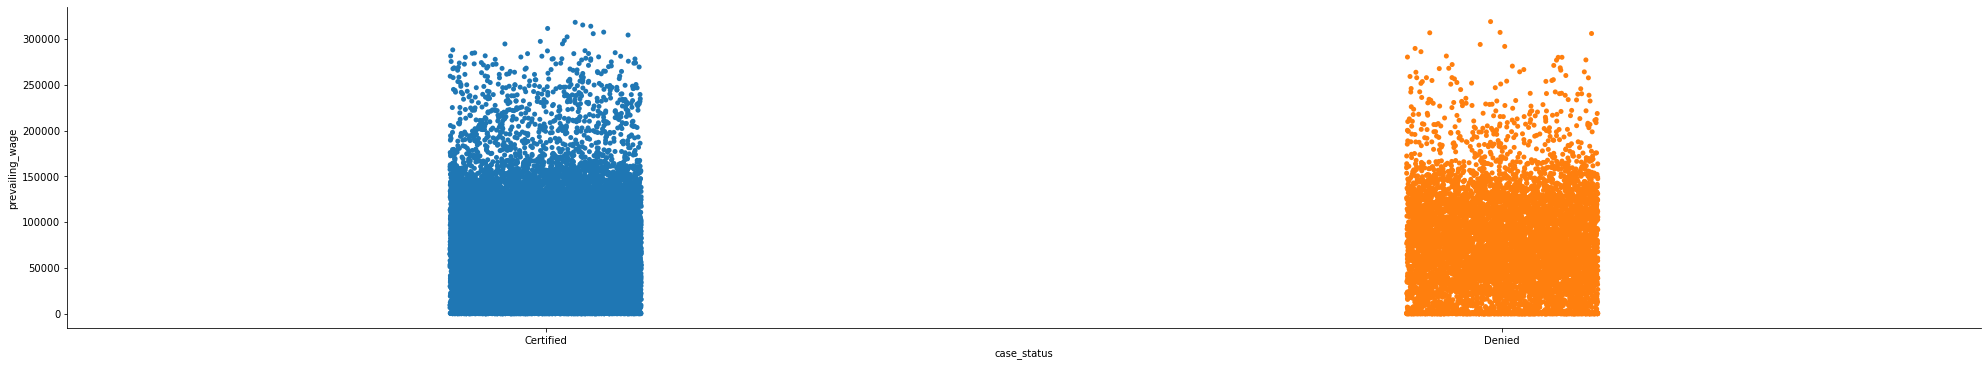

<IPython.core.display.Javascript object>

In [612]:
sns.catplot(x="case_status", y="prevailing_wage", data=df, height=5, aspect=5.5)

<AxesSubplot:xlabel='unit_of_wage', ylabel='prevailing_wage'>

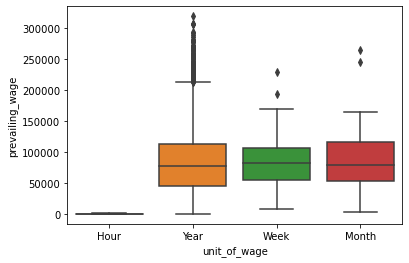

<IPython.core.display.Javascript object>

In [380]:
sns.boxplot(x="unit_of_wage", y="prevailing_wage", data=deny)

<AxesSubplot:xlabel='unit_of_wage', ylabel='prevailing_wage'>

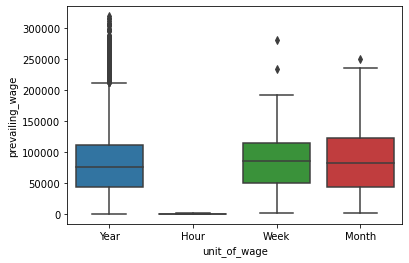

<IPython.core.display.Javascript object>

In [381]:
sns.boxplot(x="unit_of_wage", y="prevailing_wage", data=certify)

## Answer: Prevailing wage for both denied and certifiedvas applicants subsets has similar means and range, but for certified visa candidates the prevailing wage is higher. 

In [616]:
week = df[df["unit_of_wage"] == "Week"]

<IPython.core.display.Javascript object>

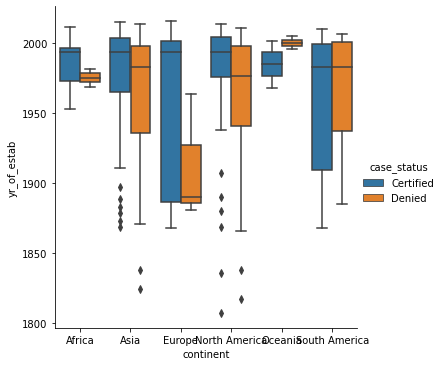

<IPython.core.display.Javascript object>

In [621]:
sns.catplot(x="continent", y="yr_of_estab", hue="case_status", kind="box", data=week)

In [619]:
year = df[df["unit_of_wage"] == "Year"]

<IPython.core.display.Javascript object>

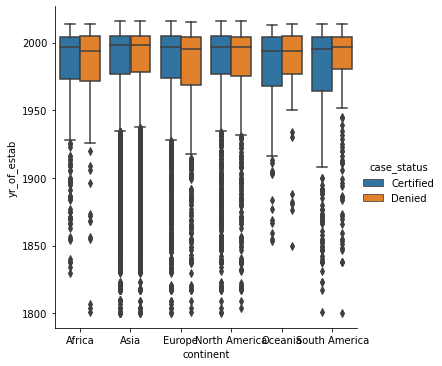

<IPython.core.display.Javascript object>

In [622]:
sns.catplot(x="continent", y="yr_of_estab", hue="case_status", kind="box", data=year)

In [623]:
month = df[df["unit_of_wage"] == "Month"]

<IPython.core.display.Javascript object>

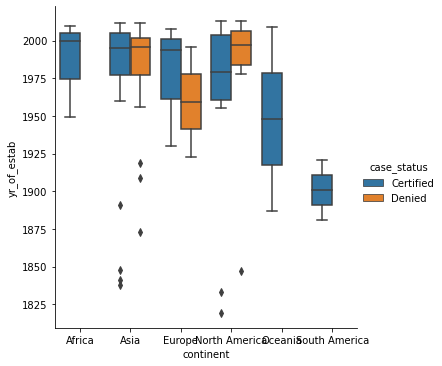

<IPython.core.display.Javascript object>

In [624]:
sns.catplot(x="continent", y="yr_of_estab", hue="case_status", kind="box", data=month)

In [625]:
hour = df[df["unit_of_wage"] == "Hour"]

<IPython.core.display.Javascript object>

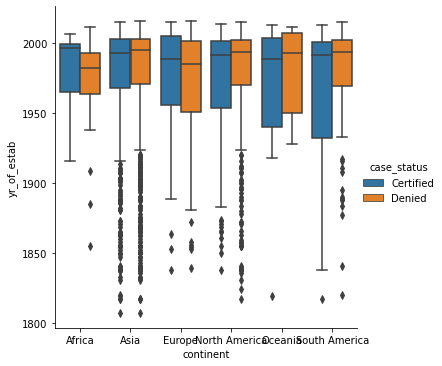

<IPython.core.display.Javascript object>

In [626]:
sns.catplot(x="continent", y="yr_of_estab", hue="case_status", kind="box", data=hour)

<AxesSubplot:xlabel='unit_of_wage', ylabel='wage_fin'>

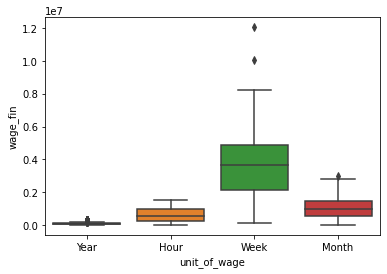

<IPython.core.display.Javascript object>

In [386]:
sns.boxplot(x="unit_of_wage", y="wage_fin", data=certify)

<AxesSubplot:xlabel='region_of_employment', ylabel='wage_fin'>

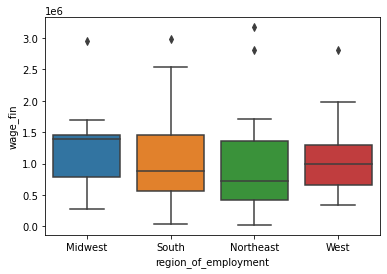

<IPython.core.display.Javascript object>

In [387]:
sns.boxplot(x="region_of_employment", y="wage_fin", data=month)

<AxesSubplot:xlabel='region_of_employment', ylabel='wage_fin'>

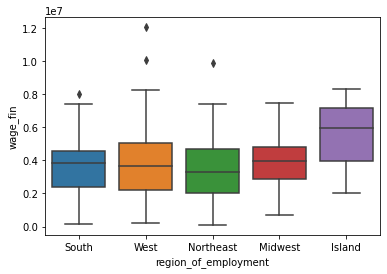

<IPython.core.display.Javascript object>

In [388]:
sns.boxplot(x="region_of_employment", y="wage_fin", data=week)

<AxesSubplot:xlabel='region_of_employment', ylabel='wage_fin'>

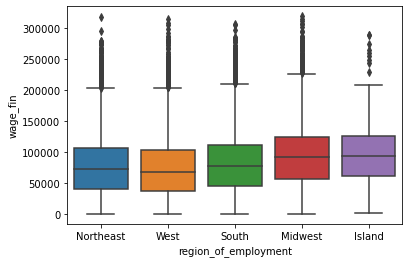

<IPython.core.display.Javascript object>

In [389]:
sns.boxplot(x="region_of_employment", y="wage_fin", data=year)

<AxesSubplot:xlabel='region_of_employment', ylabel='wage_fin'>

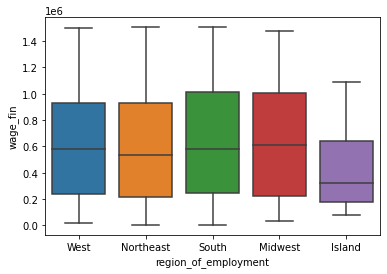

<IPython.core.display.Javascript object>

In [390]:
sns.boxplot(x="region_of_employment", y="wage_fin", data=hour)

<AxesSubplot:xlabel='education_of_employee', ylabel='prevailing_wage'>

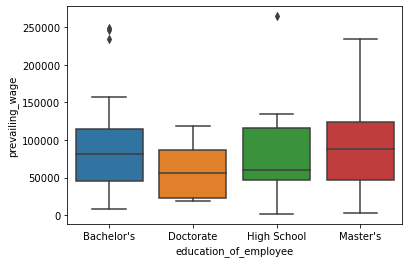

<IPython.core.display.Javascript object>

In [391]:
sns.boxplot(x="education_of_employee", y="prevailing_wage", data=month)

<AxesSubplot:xlabel='education_of_employee', ylabel='prevailing_wage'>

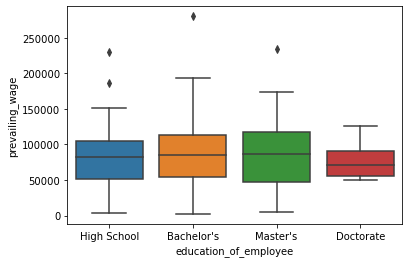

<IPython.core.display.Javascript object>

In [392]:
sns.boxplot(x="education_of_employee", y="prevailing_wage", data=week)

<AxesSubplot:xlabel='education_of_employee', ylabel='prevailing_wage'>

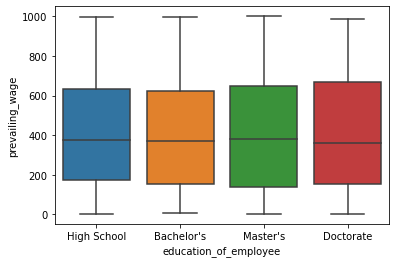

<IPython.core.display.Javascript object>

In [393]:
sns.boxplot(x="education_of_employee", y="prevailing_wage", data=hour)

<AxesSubplot:xlabel='education_of_employee', ylabel='prevailing_wage'>

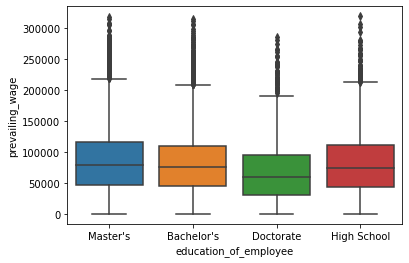

<IPython.core.display.Javascript object>

In [394]:
sns.boxplot(x="education_of_employee", y="prevailing_wage", data=year)

Answer: There does not seem to be big differences for prevailing wage data for denied and certified visas.

In [396]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25447 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25447 non-null  object 
 1   education_of_employee  25447 non-null  object 
 2   has_job_experience     25447 non-null  object 
 3   requires_job_training  25447 non-null  object 
 4   no_of_employees        25447 non-null  int64  
 5   yr_of_estab            25447 non-null  int64  
 6   region_of_employment   25447 non-null  object 
 7   prevailing_wage        25447 non-null  float64
 8   unit_of_wage           25447 non-null  object 
 9   full_time_position     25447 non-null  object 
 10  case_status            25447 non-null  object 
 11  wage_fin               25447 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 3.5+ MB


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='has_job_experience'>

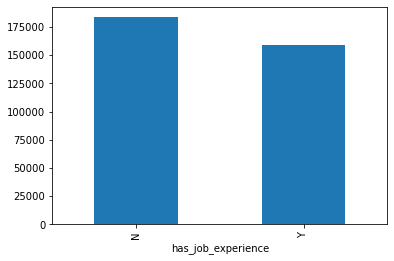

<IPython.core.display.Javascript object>

In [374]:
df.groupby("has_job_experience")["wage_fin"].mean().plot(kind="bar")

<AxesSubplot:xlabel='has_job_experience'>

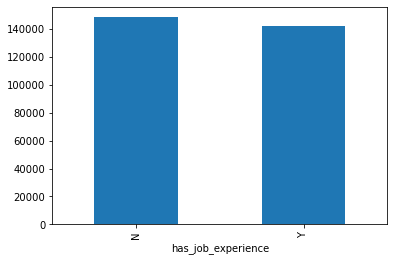

<IPython.core.display.Javascript object>

In [375]:
certify.groupby("has_job_experience")["wage_fin"].mean().plot(kind="bar")

<AxesSubplot:xlabel='has_job_experience'>

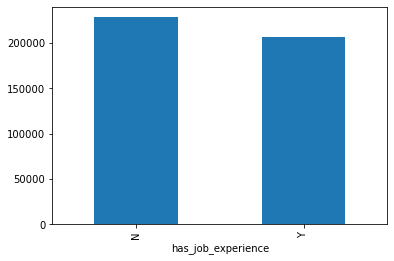

<IPython.core.display.Javascript object>

In [373]:
deny.groupby("has_job_experience")["wage_fin"].mean().plot(kind="bar")

In [397]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

case_status    Certified  Denied    All
continent                              
All                17001    8446  25447
Asia               11001    5839  16840
North America       2037    1250   3287
Europe              2953     774   3727
South America        492     359    851
Africa               396     154    550
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


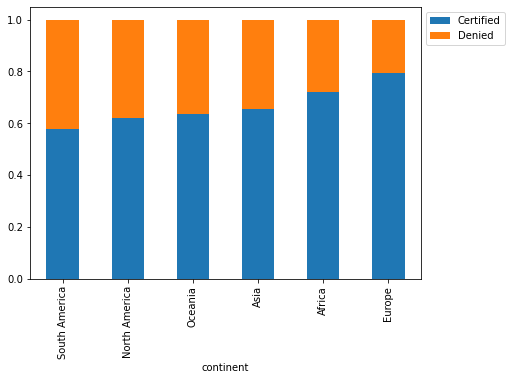

<IPython.core.display.Javascript object>

In [398]:
stacked_barplot(df, "continent", "case_status")


case_status            Certified  Denied    All
education_of_employee                          
All                        17001    8446  25447
Bachelor's                  6362    3858  10220
High School                 1164    2252   3416
Master's                    7565    2057   9622
Doctorate                   1910     279   2189
------------------------------------------------------------------------------------------------------------------------


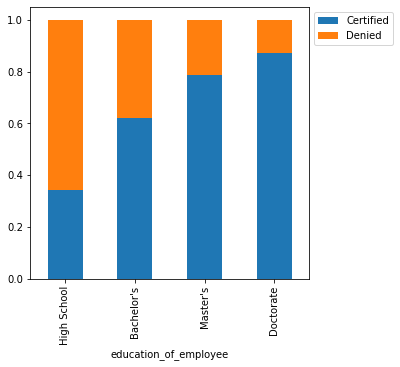

<IPython.core.display.Javascript object>

In [399]:
stacked_barplot(df, "education_of_employee", "case_status")

case_status           Certified  Denied    All
region_of_employment                          
All                       17001    8446  25447
Northeast                  4524    2665   7189
West                       4097    2481   6578
South                      4908    2098   7006
Midwest                    3246    1053   4299
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


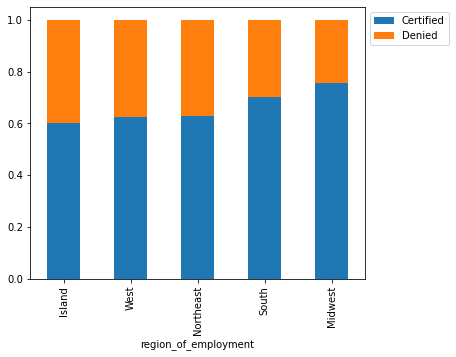

<IPython.core.display.Javascript object>

In [400]:
stacked_barplot(df, "region_of_employment", "case_status")

case_status   Certified  Denied    All
unit_of_wage                          
All               17001    8446  25447
Year              16030    6903  22933
Hour                747    1406   2153
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


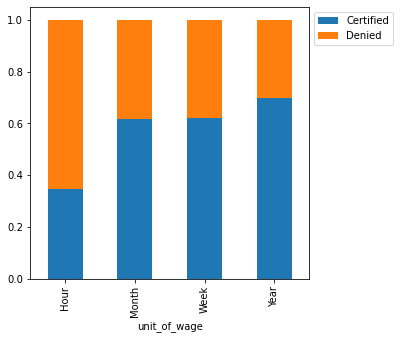

<IPython.core.display.Javascript object>

In [401]:
stacked_barplot(df, "unit_of_wage", "case_status")

case_status         Certified  Denied    All
full_time_position                          
All                     17001    8446  25447
Y                       15146    7595  22741
N                        1855     851   2706
------------------------------------------------------------------------------------------------------------------------


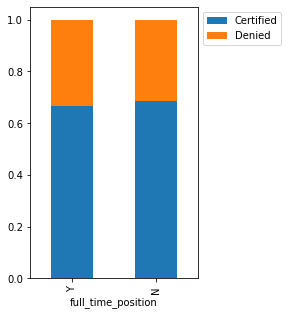

<IPython.core.display.Javascript object>

In [610]:
stacked_barplot(df, "full_time_position", "case_status")

Comments:

    * full timeposition does not change the odds of getting visa
    
    * 60+ % denied cases for hourly wage 
    
    * most certified (70%)visas have Midwest and Southwest regions
    
    * 60+% denied cases for education feature are for high school education level
    
    * highest chances of getting visa have candidateswith Masetr and Phd degree
    
    * Most certified visa for continent feature are from Europe least from South America
    
    * prior job experience increases chances of getting visa.
    
    

# Preparing the data set for model building

In [403]:
cols = df.select_dtypes(["object"])
cols.columns

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

<IPython.core.display.Javascript object>

In [404]:
for i in cols.columns:
    df[i] = df[i].astype("category")

<IPython.core.display.Javascript object>

In [405]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25447 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25447 non-null  category
 1   education_of_employee  25447 non-null  category
 2   has_job_experience     25447 non-null  category
 3   requires_job_training  25447 non-null  category
 4   no_of_employees        25447 non-null  int64   
 5   yr_of_estab            25447 non-null  int64   
 6   region_of_employment   25447 non-null  category
 7   prevailing_wage        25447 non-null  float64 
 8   unit_of_wage           25447 non-null  category
 9   full_time_position     25447 non-null  category
 10  case_status            25447 non-null  category
 11  wage_fin               25447 non-null  float64 
dtypes: category(8), float64(2), int64(2)
memory usage: 2.2 MB


<IPython.core.display.Javascript object>

In [406]:
df.describe(include=["category"]).T

,count,unique,top,freq
continent,25447,6,Asia,16840
education_of_employee,25447,4,Bachelor's,10220
has_job_experience,25447,2,Y,14786
requires_job_training,25447,2,N,22498
region_of_employment,25447,5,Northeast,7189
unit_of_wage,25447,4,Year,22933
full_time_position,25447,2,Y,22741
case_status,25447,2,Certified,17001


<IPython.core.display.Javascript object>

# Split the data

In [407]:
colscat = [
    "continent",
    "education_of_employee",
    "has_job_experience",
    "requires_job_training",
    "region_of_employment",
    "unit_of_wage",
    "full_time_position",
]

<IPython.core.display.Javascript object>

In [408]:
data = pd.get_dummies(data=df, columns=colscat, drop_first=True)

<IPython.core.display.Javascript object>

I have added an annual wage column.But since one of the questions mentons type ofwage I donot want to remove the 2 original "wage columns". I will prepare 2 sets one with new column ("wage_fin")and one where the new column replcase the orignal 2 columns.

In [409]:
data

,no_of_employees,yr_of_estab,prevailing_wage,case_status,wage_fin,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,has_job_experience_Y,requires_job_training_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_Y
0,14513,2007,592.2029,Denied,891265.3645,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
1,2412,2002,83425.6500,Certified,83425.6500,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1
2,44444,2008,122996.8600,Denied,122996.8600,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1
3,98,1897,83434.0300,Denied,83434.0300,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
4,1082,2005,149907.3900,Certified,149907.3900,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,2601,2008,77092.5700,Certified,77092.5700,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1
25476,3274,2006,279174.7900,Certified,279174.7900,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1
25477,1121,1910,146298.8500,Certified,146298.8500,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0
25478,1918,1887,86154.7700,Certified,86154.7700,1,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,1


<IPython.core.display.Javascript object>

In [474]:
X = data.drop(["case_status"], axis=1)
y = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

<IPython.core.display.Javascript object>

In [411]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)
print(X_train.shape, X_test.shape)

(17812, 22) (7635, 22)


<IPython.core.display.Javascript object>

In [413]:
y.value_counts(1)

1    0.668094
0    0.331906
Name: case_status, dtype: float64

<IPython.core.display.Javascript object>

In [414]:
y_test.value_counts(1)

1    0.668107
0    0.331893
Name: case_status, dtype: float64

<IPython.core.display.Javascript object>

Goal- maximize the f1 score

In [415]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance
    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score
    roc = roc_auc_score(target, pred)
    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
            "ROC-AUC": roc,
        },
        index=[0],
    )
    return df_perf

<IPython.core.display.Javascript object>

In [416]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

#  Decision Tree Model

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 
* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant 
class and the decision tree will become biased toward the dominant classes.

* In this case, we can pass a dictionary {0:0.67,1:0.33} to the model to specify the weight of each class and 
the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.
* I will also try "balanced" option for class_weight

In [417]:
dtree = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.67, 1: 0.33}, random_state=1
)

<IPython.core.display.Javascript object>

In [418]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.67, 1: 0.33}, random_state=1)

<IPython.core.display.Javascript object>

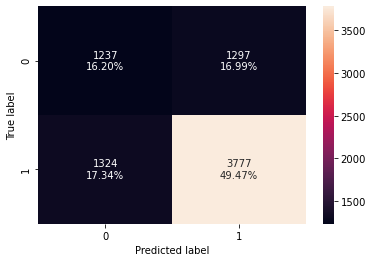

<IPython.core.display.Javascript object>

In [419]:
confusion_matrix_sklearn(dtree, X_test, y_test)

In [420]:
dtree_model_train_perf = model_performance_classification_sklearn(
    dtree, X_train, y_train
)
print("Training performance \n", dtree_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1  ROC-AUC
0       1.0     1.0        1.0  1.0      1.0


<IPython.core.display.Javascript object>

In [421]:
dtree_model_test_perf = model_performance_classification_sklearn(dtree, X_test, y_test)
print("Testing performance \n", dtree_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1   ROC-AUC
0  0.656713  0.740443   0.744383  0.742408  0.614302


<IPython.core.display.Javascript object>

In [429]:
feature_names = list(X.columns)

<IPython.core.display.Javascript object>

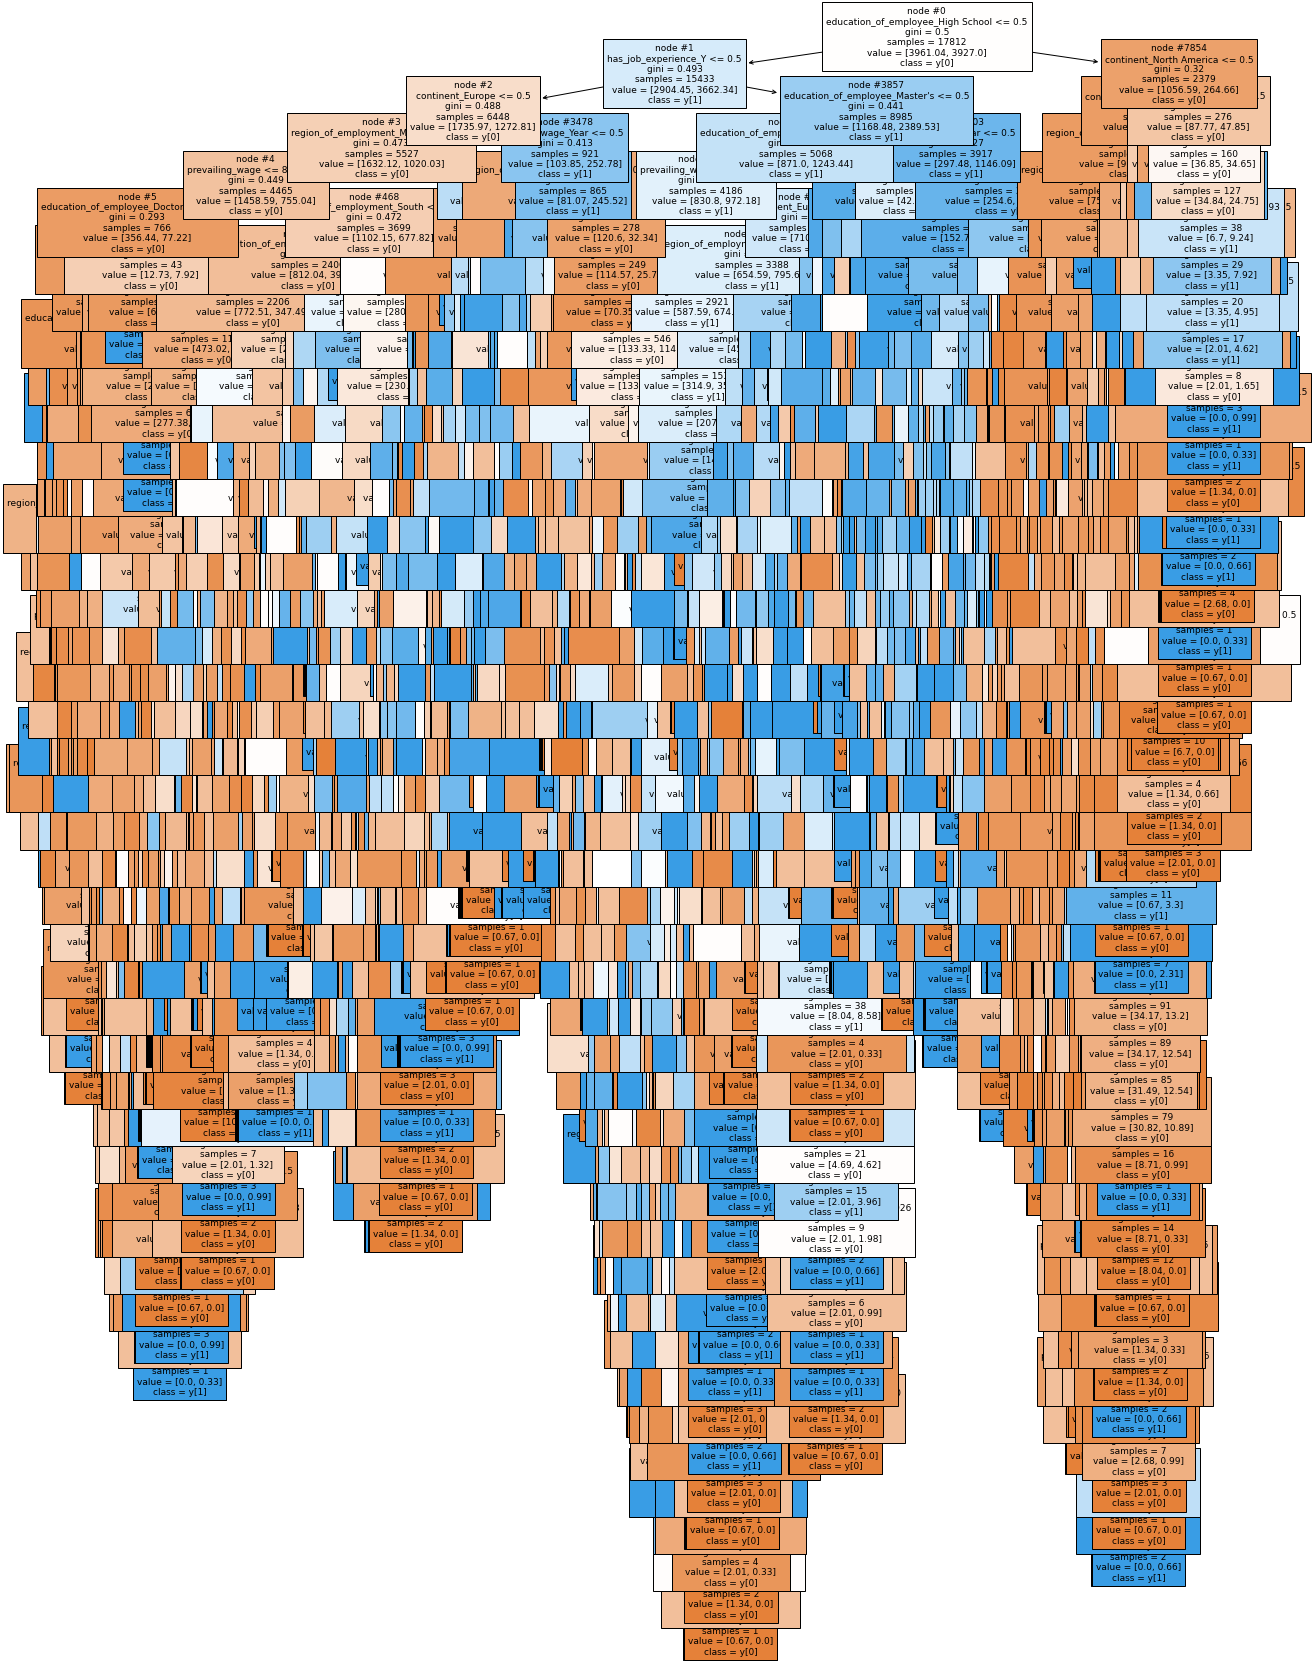

<IPython.core.display.Javascript object>

In [550]:
plt.figure(figsize=(20, 30))
tree.plot_tree(
    dtree,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [432]:
print(
    pd.DataFrame(
        dtree.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                        Imp
no_of_employees                    0.224776
yr_of_estab                        0.176344
prevailing_wage                    0.155077
wage_fin                           0.128216
education_of_employee_High School  0.071247
has_job_experience_Y               0.054523
education_of_employee_Master's     0.025179
continent_Europe                   0.022157
education_of_employee_Doctorate    0.021755
region_of_employment_Midwest       0.017849
full_time_position_Y               0.014492
requires_job_training_Y            0.013517
region_of_employment_Northeast     0.013454
region_of_employment_South         0.013257
region_of_employment_West          0.011111
continent_Asia                     0.010346
continent_North America            0.010254
unit_of_wage_Year                  0.007419
continent_South America            0.006081
continent_Oceania                  0.001884
unit_of_wage_Month                 0.000548
unit_of_wage_Week               

<IPython.core.display.Javascript object>

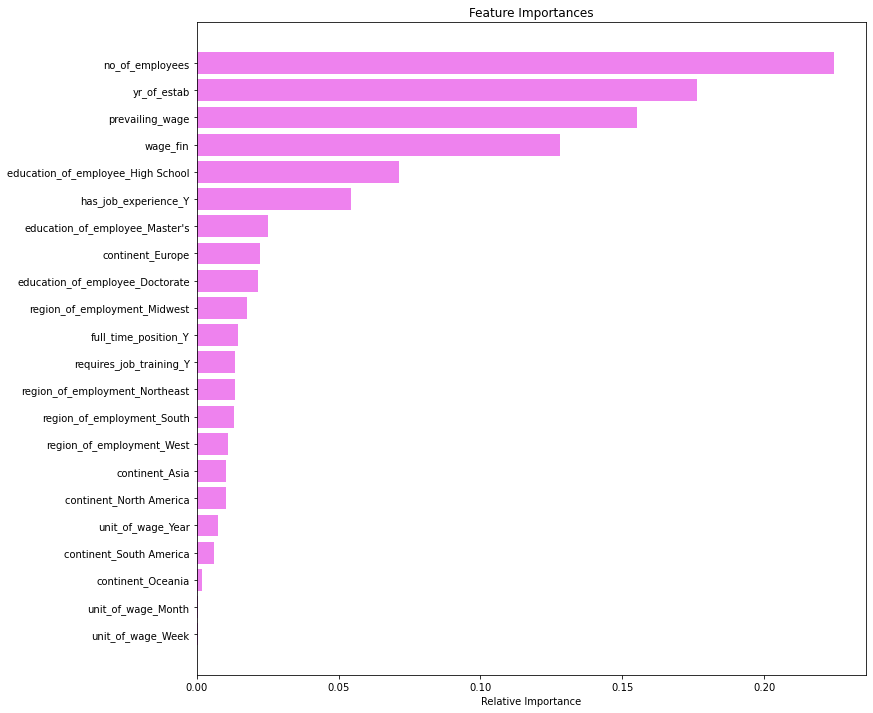

<IPython.core.display.Javascript object>

In [433]:
feature_names = X_train.columns
importances = dtree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Comment: Decision tree is working well on the training data but is not able to generalize well on the test data concerning the recall.

Now trying with balanced class_weights

In [422]:
dtree2 = DecisionTreeClassifier(
    criterion="gini", class_weight="balanced", random_state=1
)

<IPython.core.display.Javascript object>

In [423]:
dtree2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

<IPython.core.display.Javascript object>

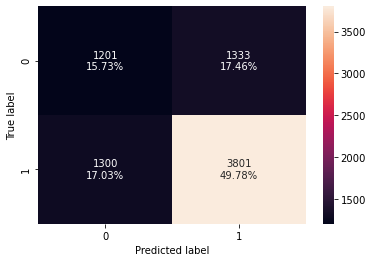

<IPython.core.display.Javascript object>

In [424]:
confusion_matrix_sklearn(dtree2, X_test, y_test)

In [425]:
dtree2_model_train_perf = model_performance_classification_sklearn(
    dtree2, X_train, y_train
)
print("Training performance \n", dtree2_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1  ROC-AUC
0       1.0     1.0        1.0  1.0      1.0


<IPython.core.display.Javascript object>

In [426]:
dtree2_model_test_perf = model_performance_classification_sklearn(
    dtree2, X_test, y_test
)
print("Testing performance \n", dtree2_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1   ROC-AUC
0  0.655141  0.745148   0.740358  0.742745  0.609551


<IPython.core.display.Javascript object>

### Comment: There is very little difference but the previous model worked a bit better.

### Comment:(I checked for multicolinearity because if the hyperparameter tuning takes toolong I will remove the linearly dependent columns)

In [427]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [428]:
checking_vif(X_train)

,feature,VIF
0,no_of_employees,1.066856
1,yr_of_estab,145.835496
2,prevailing_wage,4.325182
3,wage_fin,5.034067
4,continent_Asia,31.507844
5,continent_Europe,7.738276
6,continent_North America,6.824812
7,continent_Oceania,1.370314
8,continent_South America,2.513294
9,education_of_employee_Doctorate,1.275102


<IPython.core.display.Javascript object>

#### Comment:yr_of_estab. is strongly multicolinear feature.

# Hyperparameter Tuning decision tree model

In [434]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(
    class_weight={0: 0.67, 1: 0.33}, random_state=1
)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 30),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10, 15],
    "min_impurity_decrease": [0.0001, 0.001, 0.01, 0.1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.67, 1: 0.33}, max_depth=2,
                       max_leaf_nodes=2, min_impurity_decrease=0.0001,
                       random_state=1)

<IPython.core.display.Javascript object>

#### Comment - Hyperparametertuned decision tree has very small max_depth. We have "very general" model but with limited applicability in real life. 

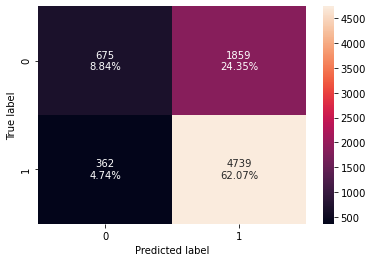

<IPython.core.display.Javascript object>

In [435]:
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

In [436]:
dtree_estimator_model_train_perf = model_performance_classification_sklearn(
    dtree_estimator, X_train, y_train
)
print("Training performance \n", dtree_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1   ROC-AUC
0  0.711599  0.932605   0.719108  0.812059  0.599675


<IPython.core.display.Javascript object>

In [437]:
dtree_estimator_model_test_perf = model_performance_classification_sklearn(
    dtree_estimator, X_test, y_test
)
print("Testing performance \n", dtree_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1   ROC-AUC
0  0.709103  0.929034   0.718248  0.810155  0.597705


<IPython.core.display.Javascript object>

In [438]:
print(
    pd.DataFrame(
        dtree_estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                   Imp
education_of_employee_High School  1.0
no_of_employees                    0.0
has_job_experience_Y               0.0
unit_of_wage_Year                  0.0
unit_of_wage_Week                  0.0
unit_of_wage_Month                 0.0
region_of_employment_West          0.0
region_of_employment_South         0.0
region_of_employment_Northeast     0.0
region_of_employment_Midwest       0.0
requires_job_training_Y            0.0
education_of_employee_Master's     0.0
yr_of_estab                        0.0
education_of_employee_Doctorate    0.0
continent_South America            0.0
continent_Oceania                  0.0
continent_North America            0.0
continent_Europe                   0.0
continent_Asia                     0.0
wage_fin                           0.0
prevailing_wage                    0.0
full_time_position_Y               0.0


<IPython.core.display.Javascript object>

#### Comment: Very simple model that is already a good model with not much overfitting. Although it is extremely simple - the only feature that is important is High School education level.  (60+% percent denied visas are for this education level)

### In order to compare with the other models it would be good to have more features,so I repeat gridsearch reoving the possibility to have too small tree. 

# Hyperparameter tuning Decision tree - 2nd model (to compare feature importance between different models)

In [439]:
# Choose the type of classifier.
dtree_estimatorb = DecisionTreeClassifier(
    class_weight={0: 0.67, 1: 0.33}, random_state=1
)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 7),
    "min_samples_leaf": [5, 7, 10],
    "max_leaf_nodes": [5, 10],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimatorb, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimatorb = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimatorb.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.67, 1: 0.33}, max_depth=5,
                       max_leaf_nodes=10, min_impurity_decrease=0.0001,
                       min_samples_leaf=5, random_state=1)

<IPython.core.display.Javascript object>

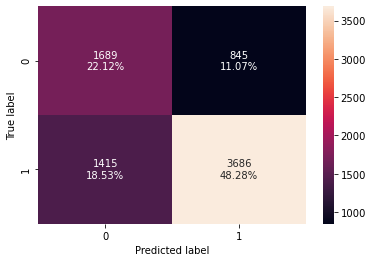

<IPython.core.display.Javascript object>

In [440]:
confusion_matrix_sklearn(dtree_estimatorb, X_test, y_test)

In [444]:
dtree_estimatorb_model_train_perf = model_performance_classification_sklearn(
    dtree_estimatorb, X_train, y_train
)
print("Training performance \n", dtree_estimatorb_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1   ROC-AUC
0  0.710645  0.730252    0.81719  0.771279  0.700715


<IPython.core.display.Javascript object>

In [445]:
dtree_estimatorb_model_test_perf = model_performance_classification_sklearn(
    dtree_estimatorb, X_test, y_test
)
print("Testing performance \n", dtree_estimatorb_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1   ROC-AUC
0  0.703995  0.722603   0.813507  0.765365  0.694569


<IPython.core.display.Javascript object>

In [446]:
print(
    pd.DataFrame(
        dtree_estimatorb.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                        Imp
education_of_employee_High School  0.347223
has_job_experience_Y               0.248913
education_of_employee_Master's     0.089846
continent_Europe                   0.081655
prevailing_wage                    0.079788
education_of_employee_Doctorate    0.072225
region_of_employment_Midwest       0.062661
unit_of_wage_Year                  0.017690
unit_of_wage_Week                  0.000000
unit_of_wage_Month                 0.000000
region_of_employment_West          0.000000
region_of_employment_South         0.000000
region_of_employment_Northeast     0.000000
no_of_employees                    0.000000
requires_job_training_Y            0.000000
yr_of_estab                        0.000000
continent_South America            0.000000
continent_Oceania                  0.000000
continent_North America            0.000000
continent_Asia                     0.000000
wage_fin                           0.000000
full_time_position_Y            

<IPython.core.display.Javascript object>

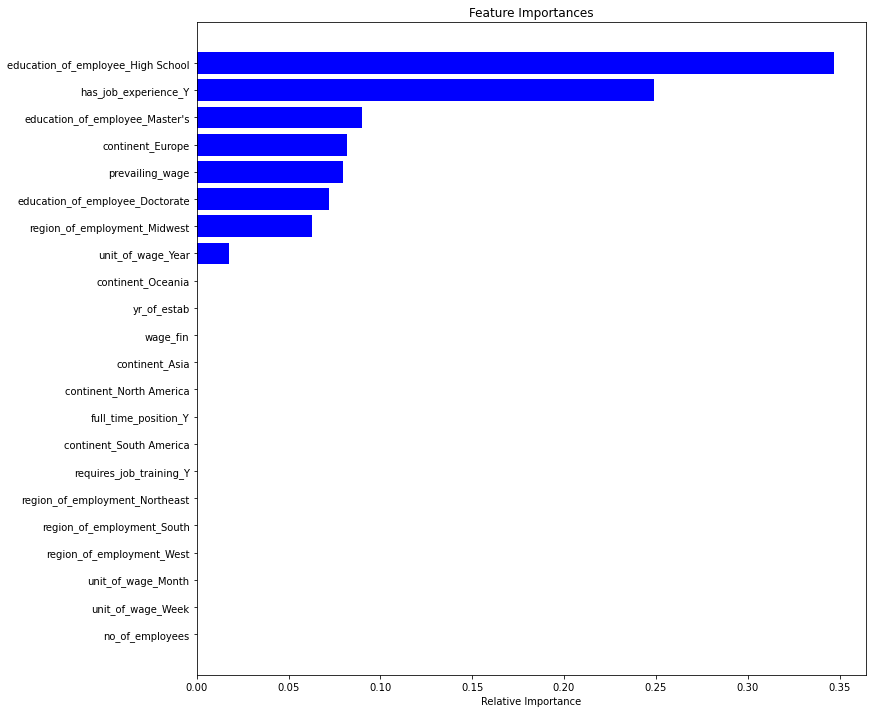

<IPython.core.display.Javascript object>

In [633]:
importances = dtree_estimatorb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

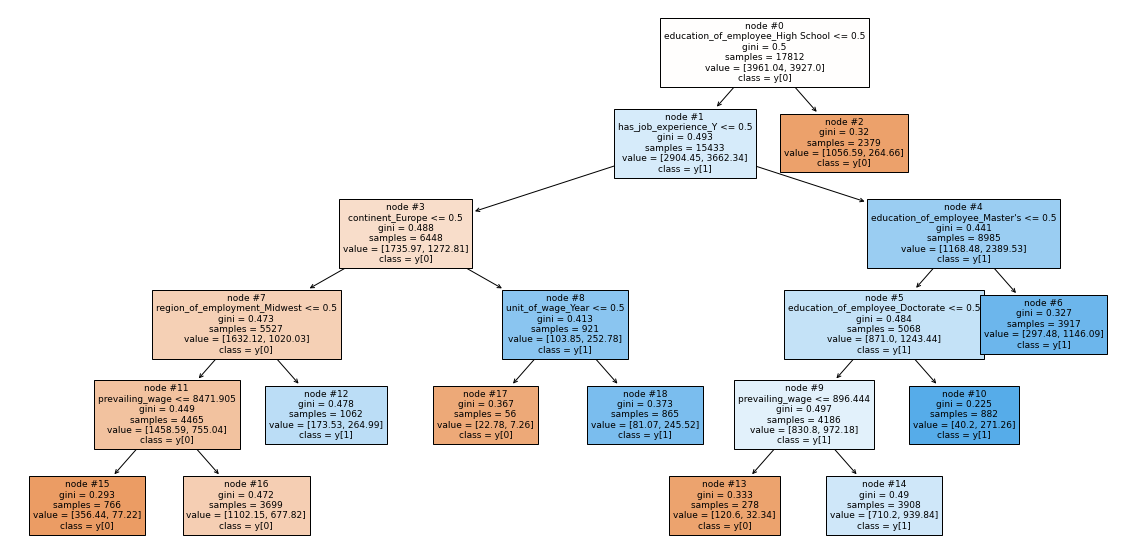

<IPython.core.display.Javascript object>

In [640]:
plt.figure(figsize=(20, 10))
tree.plot_tree(
    dtree_estimatorb,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

#### Comment: It is very good model with no overfitting and high scores. The following features are important, in order ofdecreasing importance: education_of_employee_High School, has_job_experience_Y, education_of_employee_Master, continent_Europe, prevailing_wage, education_of_employee_Doctorate, region_of_employment_Midwest, unit_of_wage_Year.

These features were important alredy in EDA so the model isconsistent with the data vizualization.  

Surprisingly the previous model - default without hyperparameter tuning has better scores. 

# Prepare the randomized half sample set to get faster hyperparameter tuning 

In [464]:
df2 = data.sample(frac=0.5)

<IPython.core.display.Javascript object>

In [465]:
Xt = df2.drop(["case_status"], axis=1)
yt = df2["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

<IPython.core.display.Javascript object>

In [472]:
len(yt)

12724

<IPython.core.display.Javascript object>

In [476]:
# Splitting data into training and test set:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    Xt, yt, test_size=0.3, random_state=1
)
print(X_train2.shape, X_test2.shape)

(8906, 22) (3818, 22)


<IPython.core.display.Javascript object>

# Random Forest

Training performance:
    Accuracy    Recall  Precision        F1   ROC-AUC
0  0.999888  0.999916   0.999916  0.999916  0.999873
Testing performance:
    Accuracy    Recall  Precision       F1   ROC-AUC
0  0.723379  0.836895   0.769328  0.80169  0.665882


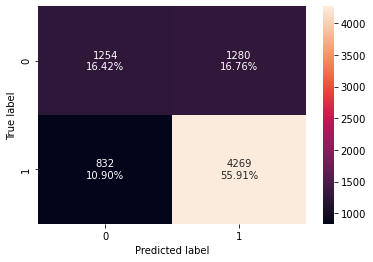

<IPython.core.display.Javascript object>

In [450]:
# Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train, y_train)

# Calculating different metrics
rf_estimator_model_train_perf = model_performance_classification_sklearn(
    rf_estimator, X_train, y_train
)
print("Training performance:\n", rf_estimator_model_train_perf)
rf_estimator_model_test_perf = model_performance_classification_sklearn(
    rf_estimator, X_test, y_test
)
print("Testing performance:\n", rf_estimator_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

Comment: Random forest model has some overfitting so it is not very general. 

In [451]:
feature_names = X_train.columns

<IPython.core.display.Javascript object>

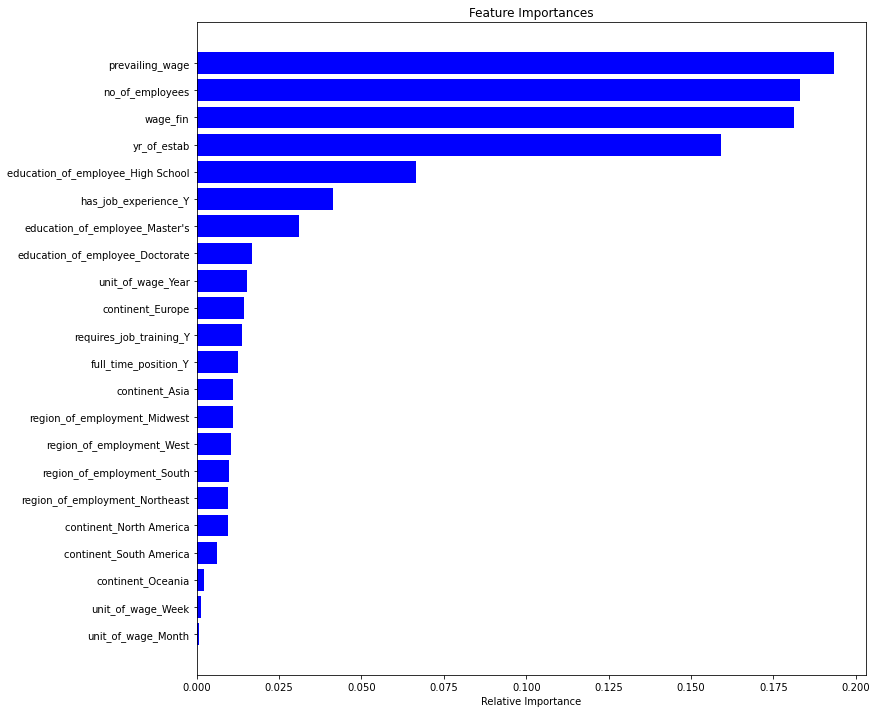

<IPython.core.display.Javascript object>

In [452]:
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [453]:
print(
    pd.DataFrame(
        rf_estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                        Imp
prevailing_wage                    0.193483
no_of_employees                    0.183054
wage_fin                           0.181228
yr_of_estab                        0.158965
education_of_employee_High School  0.066683
has_job_experience_Y               0.041245
education_of_employee_Master's     0.031084
education_of_employee_Doctorate    0.016886
unit_of_wage_Year                  0.015184
continent_Europe                   0.014393
requires_job_training_Y            0.013596
full_time_position_Y               0.012680
continent_Asia                     0.011051
region_of_employment_Midwest       0.010921
region_of_employment_West          0.010274
region_of_employment_South         0.009719
region_of_employment_Northeast     0.009512
continent_North America            0.009434
continent_South America            0.006114
continent_Oceania                  0.002262
unit_of_wage_Week                  0.001425
unit_of_wage_Month              

<IPython.core.display.Javascript object>

#### Comment: The Random forest model is overfittng. As the model is more complicated it includes other factors thn only High school education. In order of decreasing importance: prevailing_wage, no_of_employees, wage_fin                           yr_of_estab, education_of_employee_High School, has_job_experience_Y.


## For parameter tuning I will use now smaller set. 

#  Hyperparameter Tuning Random Forest


In [478]:
# Choose the type of classifier.
rf_estimator2 = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [110, 200],
    "max_features": [0.7, 0.9, "log2", "auto"],
    "max_samples": [0.7, 0.9, None],
}

# Run the grid search
grid_obj = GridSearchCV(rf_estimator2, parameters, scoring="f1", cv=5)
grid_obj = grid_obj.fit(X_train2, y_train2)

# Set the clf to the best combination of parameters
rf_estimator2 = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator2.fit(X_train, y_train)

RandomForestClassifier(max_features='log2', max_samples=0.7, n_estimators=200,
                       random_state=1)

<IPython.core.display.Javascript object>

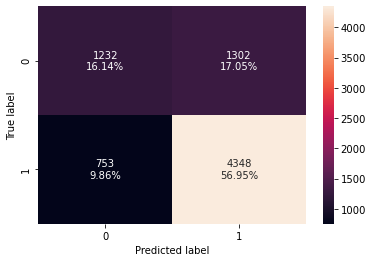

<IPython.core.display.Javascript object>

In [479]:
confusion_matrix_sklearn(rf_estimator2, X_test, y_test)

In [536]:
rf_estimator2_model_train_perf = model_performance_classification_sklearn(
    rf_estimator2, X_train, y_train
)
print("Training performance \n", rf_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1  ROC-AUC
0  0.996744  0.999496   0.995647  0.997568  0.99535


<IPython.core.display.Javascript object>

In [537]:
rf_estimator2_model_test_perf = model_performance_classification_sklearn(
    rf_estimator2, X_test, y_test
)
print("Testing performance \n", rf_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1   ROC-AUC
0  0.730845  0.852382   0.769558  0.808855  0.669285


<IPython.core.display.Javascript object>

In [538]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        rf_estimator2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                        Imp
prevailing_wage                    0.192054
no_of_employees                    0.182744
wage_fin                           0.180842
yr_of_estab                        0.157374
education_of_employee_High School  0.066396
has_job_experience_Y               0.042465
education_of_employee_Master's     0.031602
education_of_employee_Doctorate    0.016300
unit_of_wage_Year                  0.015456
continent_Europe                   0.014091
requires_job_training_Y            0.013849
full_time_position_Y               0.013157
continent_Asia                     0.011552
region_of_employment_Midwest       0.011023
region_of_employment_West          0.010511
continent_North America            0.010001
region_of_employment_Northeast     0.009963
region_of_employment_South         0.009847
continent_South America            0.006036
continent_Oceania                  0.002261
unit_of_wage_Week                  0.001532
unit_of_wage_Month              

<IPython.core.display.Javascript object>

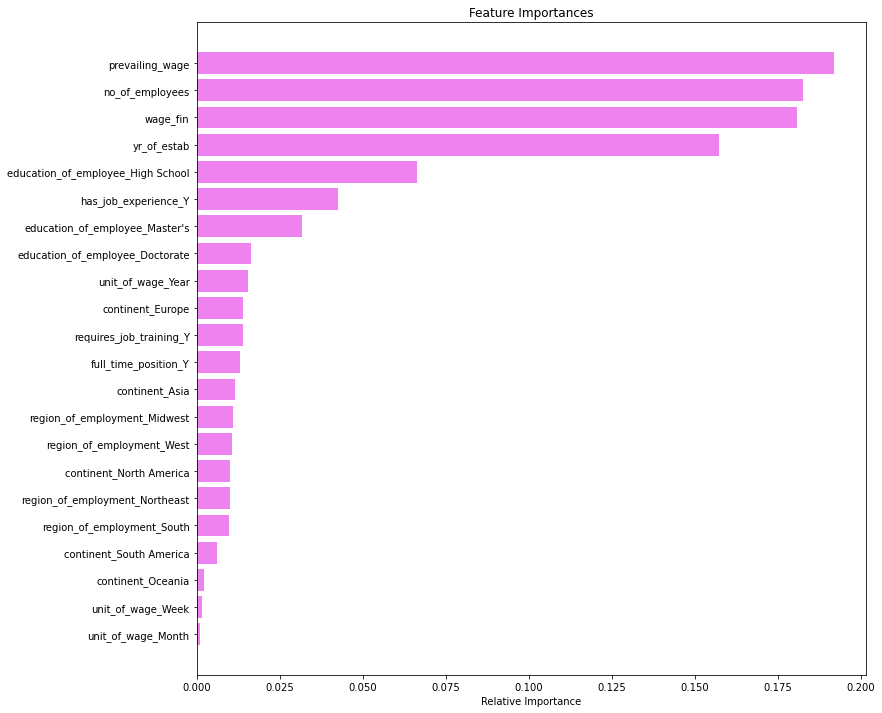

<IPython.core.display.Javascript object>

In [539]:
importances = rf_estimator2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Comments:Strong overfitting. Model is not better thn "default" random forest. 
Features in decreasing order of importance:
prevailing_wage, no_of_employees,wage_fin, yr_of_estab, education_of_employee_High School, has_job_experience_Y,              education_of_employee_Master,education_of_employee_Doctorate, unit_of_wage_Year, continent_Europe                  

# Building bagging and boosting models

# Bagging classifier default model

   Accuracy    Recall  Precision        F1   ROC-AUC
0  0.985066  0.986134   0.991467  0.988793  0.984525
   Accuracy    Recall  Precision        F1   ROC-AUC
0  0.700065  0.778671   0.773816  0.776236  0.660251


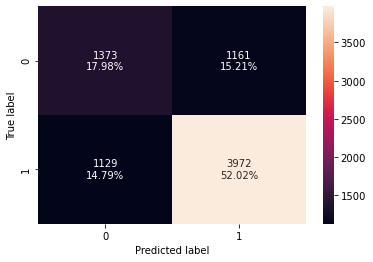

<IPython.core.display.Javascript object>

In [484]:
# Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train, y_train)

# Calculating different metrics
bagging_classifier_model_train_perf = model_performance_classification_sklearn(
    bagging_classifier, X_train, y_train
)
print(bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf = model_performance_classification_sklearn(
    bagging_classifier, X_test, y_test
)
print(bagging_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

#### Comment: For the default bagging classifier the model performs very well for train data but worse for test. So it overfits to noise in the data set.

# Hyperparameter Tuning for bagging classifier with decision trees

In [485]:
# grid search for bagging classifier
cl1 = DecisionTreeClassifier(class_weight={0: 0.67, 1: 0.33}, random_state=1)
param_grid = {
    "base_estimator": [cl1],
    "n_estimators": [5, 7, 15, 51, 101],
    "max_features": [0.7, 0.8, 0.9, 1],
}

grid = GridSearchCV(
    BaggingClassifier(random_state=1, bootstrap=True),
    param_grid=param_grid,
    scoring="f1",
    cv=5,
)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=1),
             param_grid={'base_estimator': [DecisionTreeClassifier(class_weight={0: 0.67,
                                                                                 1: 0.33},
                                                                   random_state=1)],
                         'max_features': [0.7, 0.8, 0.9, 1],
                         'n_estimators': [5, 7, 15, 51, 101]},
             scoring='f1')

<IPython.core.display.Javascript object>

In [486]:
## getting the best estimator
bagging_estimator = grid.best_estimator_
bagging_estimator.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.67,
                                                                      1: 0.33},
                                                        random_state=1),
                  max_features=0.7, n_estimators=101, random_state=1)

<IPython.core.display.Javascript object>

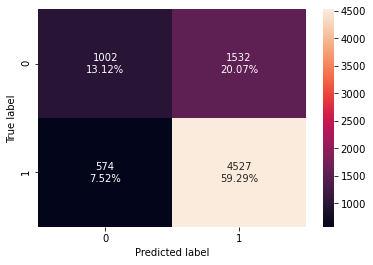

<IPython.core.display.Javascript object>

In [487]:
confusion_matrix_sklearn(bagging_estimator, X_test, y_test)

In [488]:
bagging_estimator_model_train_perf = model_performance_classification_sklearn(
    bagging_estimator, X_train, y_train
)
print("Training performance \n", bagging_estimator_model_train_perf)

Training performance 
    Accuracy  Recall  Precision        F1   ROC-AUC
0  0.999944     1.0   0.999916  0.999958  0.999915


<IPython.core.display.Javascript object>

In [489]:
bagging_estimator_model_test_perf = model_performance_classification_sklearn(
    bagging_estimator, X_test, y_test
)
print("Testing performance \n", bagging_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision       F1   ROC-AUC
0  0.724165  0.887473   0.747153  0.81129  0.641448


<IPython.core.display.Javascript object>

#### Comment: Ensemble models are less interpretable than decision tree but bagging classifier is even less interpretable than random forest. It does not even have a feature importance attribute. And we have overfitting after hyperparameter tuning.

# Boosting models

# Adaboost classifier

In [490]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [491]:
abc_model_train_perf = model_performance_classification_sklearn(abc, X_train, y_train)
print("Training performance \n", abc_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1   ROC-AUC
0   0.74068  0.889496   0.762114  0.820893  0.665316


<IPython.core.display.Javascript object>

In [492]:
abc_model_test_perf = model_performance_classification_sklearn(abc, X_test, y_test)
print("Testing performance \n", abc_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1   ROC-AUC
0  0.735298  0.878455   0.761816  0.815988  0.662787


<IPython.core.display.Javascript object>

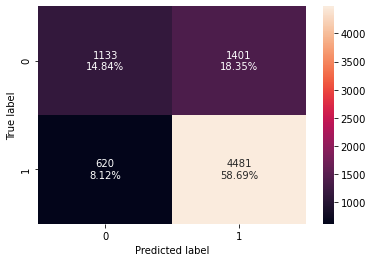

<IPython.core.display.Javascript object>

In [493]:
confusion_matrix_sklearn(abc, X_test, y_test)

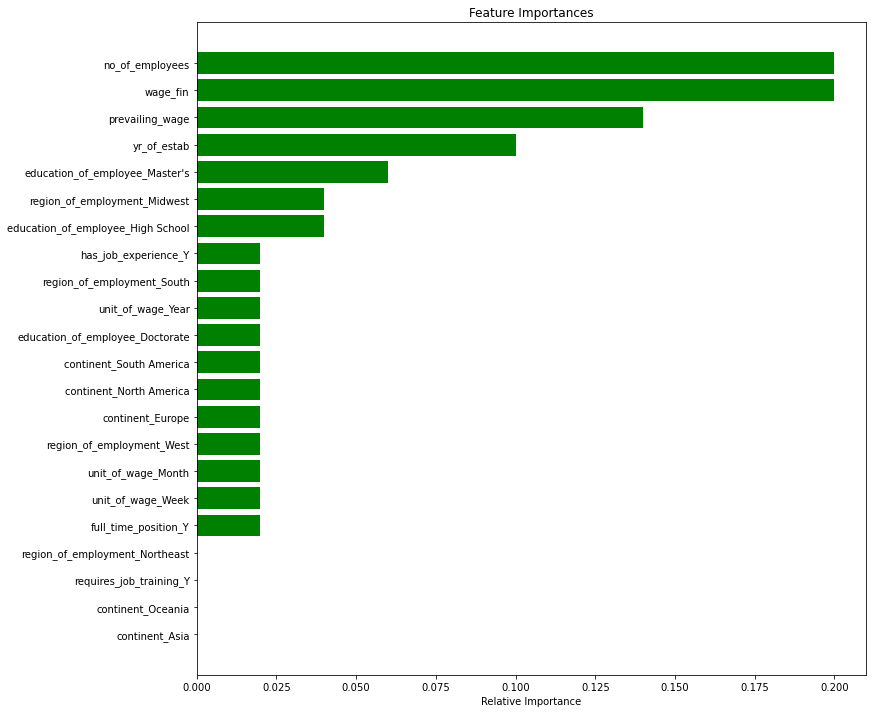

<IPython.core.display.Javascript object>

In [494]:
importances = abc.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="green", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [495]:
print(
    pd.DataFrame(
        abc.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                    Imp
no_of_employees                    0.20
wage_fin                           0.20
prevailing_wage                    0.14
yr_of_estab                        0.10
education_of_employee_Master's     0.06
region_of_employment_Midwest       0.04
education_of_employee_High School  0.04
continent_Europe                   0.02
unit_of_wage_Year                  0.02
unit_of_wage_Week                  0.02
unit_of_wage_Month                 0.02
region_of_employment_West          0.02
region_of_employment_South         0.02
full_time_position_Y               0.02
continent_North America            0.02
has_job_experience_Y               0.02
education_of_employee_Doctorate    0.02
continent_South America            0.02
region_of_employment_Northeast     0.00
continent_Asia                     0.00
continent_Oceania                  0.00
requires_job_training_Y            0.00


<IPython.core.display.Javascript object>

### Comment: 
#### Already a default Adaboost model works very well. The scores are high and there is no overfitting.The following features are important: no_of_employees, wage_fin, prevailing_wage, yr_of_estab, education_of_employee_Master,region_of_employment_Midwest, education_of_employee_High School,continent_Europe,unit_of_wage_Year

# Gradient Boosting Classifier

In [496]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [497]:
gbc_model_train_perf = model_performance_classification_sklearn(gbc, X_train, y_train)
print("Training performance \n", gbc_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1   ROC-AUC
0  0.757074  0.878739   0.783824  0.828573  0.695459


<IPython.core.display.Javascript object>

In [498]:
gbc_model_test_perf = model_performance_classification_sklearn(gbc, X_test, y_test)
print("Training performance \n", gbc_model_test_perf)

Training performance 
    Accuracy    Recall  Precision        F1   ROC-AUC
0  0.747741  0.867477   0.779736  0.821269  0.687093


<IPython.core.display.Javascript object>

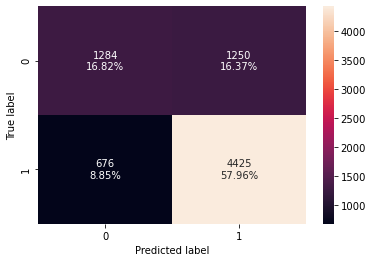

<IPython.core.display.Javascript object>

In [499]:
confusion_matrix_sklearn(gbc, X_test, y_test)

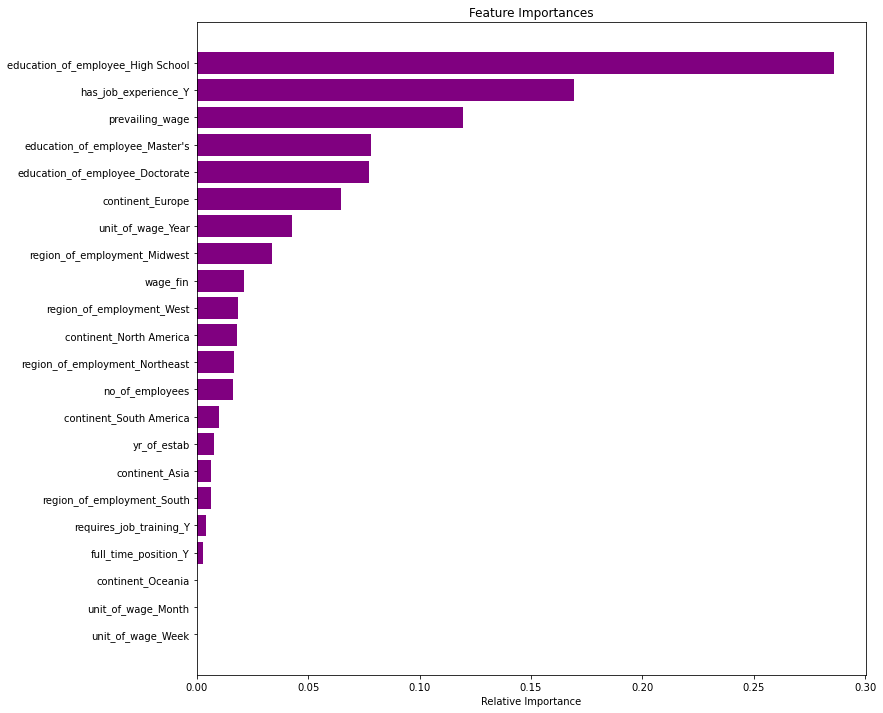

<IPython.core.display.Javascript object>

In [500]:
importances = gbc.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="purple", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [501]:
print(
    pd.DataFrame(
        gbc.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                        Imp
education_of_employee_High School  0.286179
has_job_experience_Y               0.169447
prevailing_wage                    0.119489
education_of_employee_Master's     0.078276
education_of_employee_Doctorate    0.077454
continent_Europe                   0.064625
unit_of_wage_Year                  0.042604
region_of_employment_Midwest       0.033690
wage_fin                           0.021013
region_of_employment_West          0.018431
continent_North America            0.018205
region_of_employment_Northeast     0.016750
no_of_employees                    0.016370
continent_South America            0.009842
yr_of_estab                        0.007575
continent_Asia                     0.006455
region_of_employment_South         0.006292
requires_job_training_Y            0.004330
full_time_position_Y               0.002698
continent_Oceania                  0.000274
unit_of_wage_Month                 0.000000
unit_of_wage_Week               

<IPython.core.display.Javascript object>

### Comment: Model performs similarly for test and rain sets - so no overfitting. F1 and recall scores are v.good. 

Important features:education_of_employee_High,School,has_job_experience_Y, prevailing_wage,education_of_employee_Master, education_of_employee_Doctorate,continent_Europe,unit_of_wage_Year,region_of_employment_Midwest

# XGboost Classifier

In [502]:
xgb = XGBClassifier(random_state=1, eval_metric="logloss")
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy    Recall  Precision        F1   ROC-AUC
0  0.831518  0.927899   0.837467  0.880367  0.782708
Testing performance:
    Accuracy    Recall  Precision        F1   ROC-AUC
0  0.733071  0.857087   0.769583  0.810981  0.670256


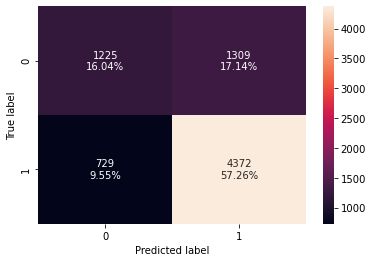

<IPython.core.display.Javascript object>

In [503]:
xgb_classifier_model_train_perf = model_performance_classification_sklearn(
    xgb, X_train, y_train
)
print("Training performance:\n", xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf = model_performance_classification_sklearn(
    xgb, X_test, y_test
)
print("Testing performance:\n", xgb_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(xgb, X_test, y_test)

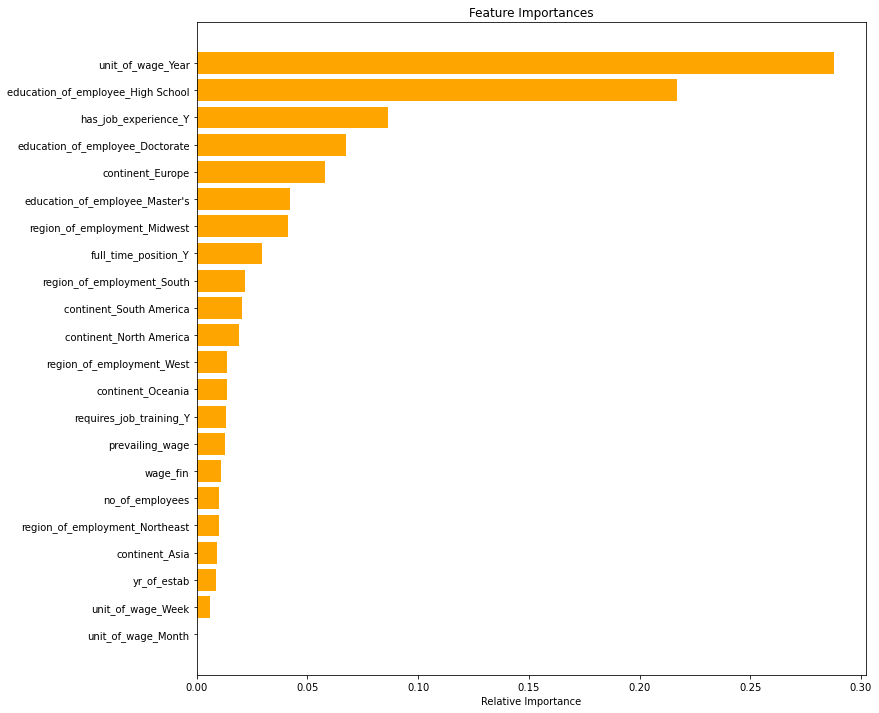

<IPython.core.display.Javascript object>

In [504]:
importances = xgb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="orange", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [505]:
print(
    pd.DataFrame(
        xgb.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                        Imp
unit_of_wage_Year                  0.288036
education_of_employee_High School  0.216792
has_job_experience_Y               0.086417
education_of_employee_Doctorate    0.067386
continent_Europe                   0.058033
education_of_employee_Master's     0.042223
region_of_employment_Midwest       0.041050
full_time_position_Y               0.029455
region_of_employment_South         0.021766
continent_South America            0.020680
continent_North America            0.019094
region_of_employment_West          0.013776
continent_Oceania                  0.013750
requires_job_training_Y            0.013186
prevailing_wage                    0.012652
wage_fin                           0.011147
no_of_employees                    0.010013
region_of_employment_Northeast     0.010002
continent_Asia                     0.009392
yr_of_estab                        0.008934
unit_of_wage_Week                  0.006217
unit_of_wage_Month              

<IPython.core.display.Javascript object>

#### Comment: 
Xgboost classifier workswell the only small issue is the small difference between test and train - for  f1 score. 
But all of the scores are high (the highest). 

Important features: unit_of_wage_Year,education_of_employee_High School, has_job_experience_Y, education_of_employee_Doctorate, 
continent_Europe, education_of_employee_Master, region_of_employment_Midwest, full_time_position_Y   

# Boosting models hyperparameter tuning

# Adaboost hyperparameter tuning 

In [526]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1),
        DecisionTreeClassifier(max_depth=2),
        DecisionTreeClassifier(max_depth=3),
    ],
    "n_estimators": np.arange(10, 90, 10),
    "learning_rate": np.arange(0.1, 2, 0.1),
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train2, y_train2)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.1, random_state=1)

<IPython.core.display.Javascript object>

   Accuracy    Recall  Precision        F1   ROC-AUC
0   0.75393  0.880924   0.779463  0.827094  0.689616
   Accuracy    Recall  Precision        F1   ROC-AUC
0  0.745776  0.871594   0.775645  0.820825  0.682048


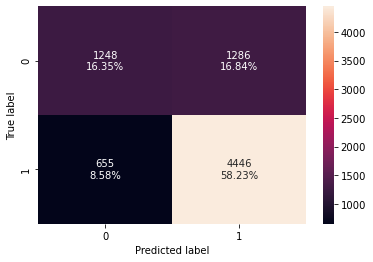

<IPython.core.display.Javascript object>

In [527]:
# Calculating different metrics
abc_tuned_model_train_perf = model_performance_classification_sklearn(
    abc_tuned, X_train, y_train
)
print(abc_tuned_model_train_perf)
abc_tuned_model_test_perf = model_performance_classification_sklearn(
    abc_tuned, X_test, y_test
)
print(abc_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

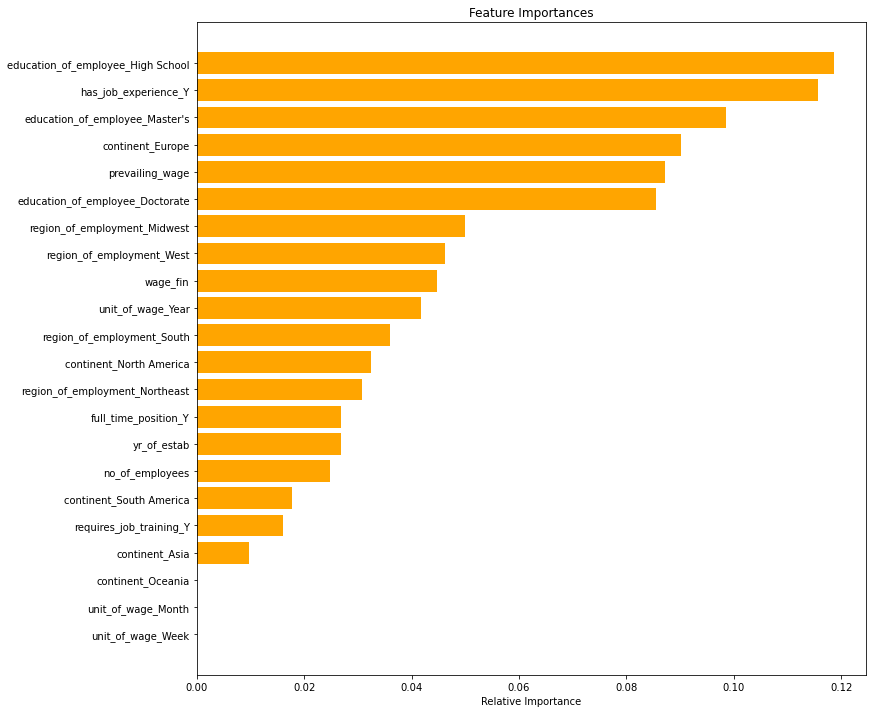

<IPython.core.display.Javascript object>

In [528]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="orange", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [529]:
print(
    pd.DataFrame(
        abc_tuned.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                        Imp
education_of_employee_High School  0.118742
has_job_experience_Y               0.115677
education_of_employee_Master's     0.098567
continent_Europe                   0.090123
prevailing_wage                    0.087174
education_of_employee_Doctorate    0.085535
region_of_employment_Midwest       0.050045
region_of_employment_West          0.046144
wage_fin                           0.044782
unit_of_wage_Year                  0.041788
region_of_employment_South         0.035913
continent_North America            0.032528
region_of_employment_Northeast     0.030735
full_time_position_Y               0.026962
yr_of_estab                        0.026881
no_of_employees                    0.024797
continent_South America            0.017829
requires_job_training_Y            0.016022
continent_Asia                     0.009758
continent_Oceania                  0.000000
unit_of_wage_Month                 0.000000
unit_of_wage_Week               

<IPython.core.display.Javascript object>

#### Comment:
Adaboost hyperparameter tuned classifier works very well. It has remarkably high recall and no overfitting. 

The most important features:education_of_employee_High School, has_job_experience_Y, education_of_employee_Master,
continent_Europe, prevailing_wage, education_of_employee_Doctorate, region_of_employment_Midwest.     

# Gradient Boost hyperparameter tuning

In [507]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100, 150, 200],
    "subsample": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train2, y_train2)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, random_state=1, subsample=0.8)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy   Recall  Precision        F1   ROC-AUC
0  0.757186  0.87479   0.785957  0.827998  0.697628
Testing performance:
    Accuracy    Recall  Precision        F1   ROC-AUC
0  0.747741  0.863556   0.781721  0.820604  0.689079


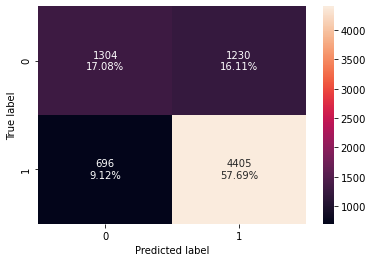

<IPython.core.display.Javascript object>

In [508]:
# Calculating different metrics
gbc_tuned_model_train_perf = model_performance_classification_sklearn(
    gbc_tuned, X_train, y_train
)
print("Training performance:\n", gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf = model_performance_classification_sklearn(
    gbc_tuned, X_test, y_test
)
print("Testing performance:\n", gbc_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

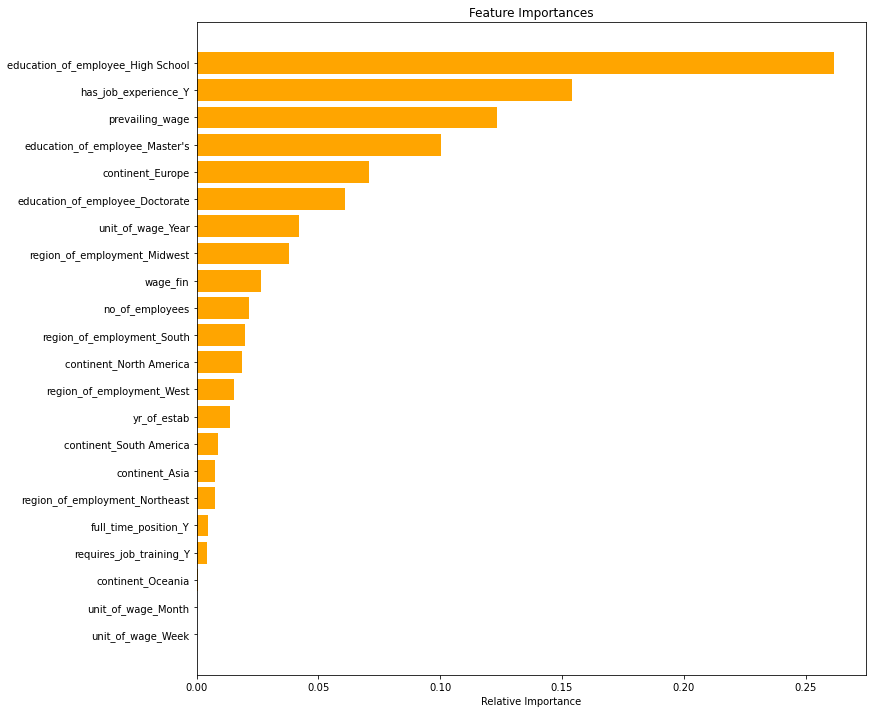

<IPython.core.display.Javascript object>

In [510]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="orange", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [512]:
print(
    pd.DataFrame(
        gbc_tuned.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                        Imp
education_of_employee_High School  0.261843
has_job_experience_Y               0.154298
prevailing_wage                    0.123258
education_of_employee_Master's     0.100178
continent_Europe                   0.070591
education_of_employee_Doctorate    0.061073
unit_of_wage_Year                  0.042012
region_of_employment_Midwest       0.037983
wage_fin                           0.026325
no_of_employees                    0.021650
region_of_employment_South         0.019827
continent_North America            0.018426
region_of_employment_West          0.015175
yr_of_estab                        0.013618
continent_South America            0.008906
continent_Asia                     0.007595
region_of_employment_Northeast     0.007315
full_time_position_Y               0.004737
requires_job_training_Y            0.004296
continent_Oceania                  0.000714
unit_of_wage_Month                 0.000180
unit_of_wage_Week               

<IPython.core.display.Javascript object>

#### Comment:
Gradient Boost hyperparaeter tuned  is very good model. All scores are high, no overfitting.

The important features: education_of_employee_High School, has_job_experience_Y, prevailing_wage,
education_of_employee_Master, continent_Europe, education_of_employee_Doctorate.

# XGBoost tuning

In [513]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10, 30, 50],
    "scale_pos_weight": [1, 2, 5],
    "subsample": [0.7, 0.9, 1],
    "learning_rate": [0.05, 0.1, 0.2],
    "colsample_bytree": [0.7, 0.9, 1],
    "colsample_bylevel": [0.5, 0.7, 1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train2, y_train2)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, eval_metric='logloss', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=12, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy    Recall  Precision        F1   ROC-AUC
0  0.748428  0.921597   0.755563  0.830362  0.660731
Testing performance:
    Accuracy   Recall  Precision        F1   ROC-AUC
0  0.738834  0.91237   0.750524  0.823571  0.650936


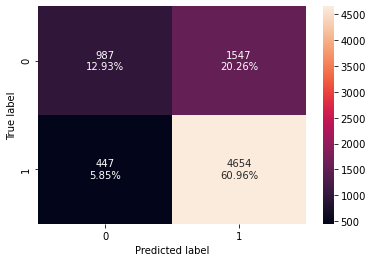

<IPython.core.display.Javascript object>

In [514]:
# Calculating different metrics
xgb_tuned_model_train_perf = model_performance_classification_sklearn(
    xgb_tuned, X_train, y_train
)
print("Training performance:\n", xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf = model_performance_classification_sklearn(
    xgb_tuned, X_test, y_test
)
print("Testing performance:\n", xgb_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)

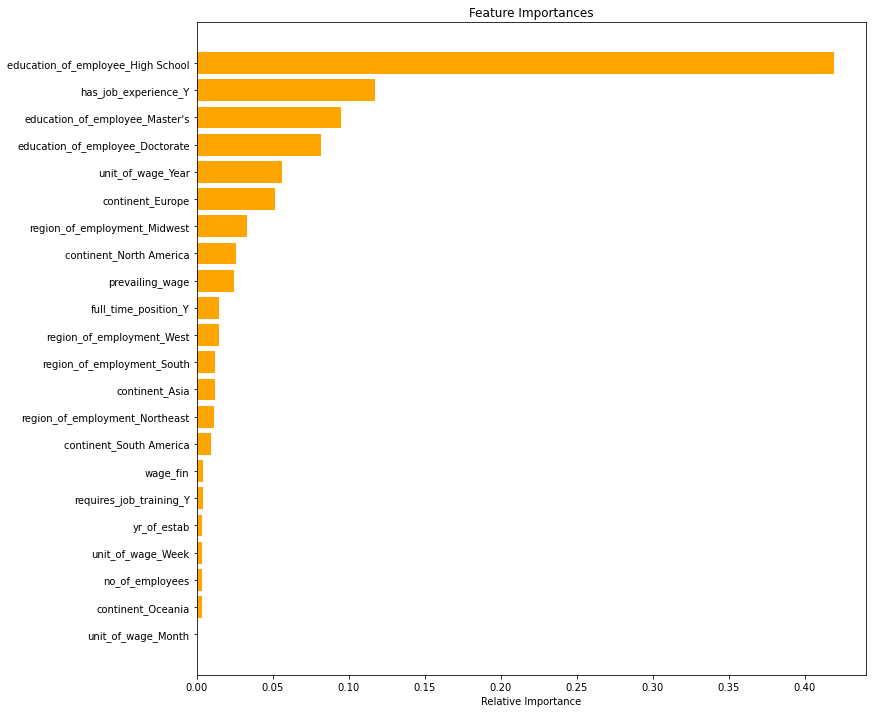

<IPython.core.display.Javascript object>

In [515]:
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="orange", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [516]:
print(
    pd.DataFrame(
        xgb_tuned.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                        Imp
education_of_employee_High School  0.419430
has_job_experience_Y               0.117259
education_of_employee_Master's     0.094718
education_of_employee_Doctorate    0.081989
unit_of_wage_Year                  0.056193
continent_Europe                   0.051185
region_of_employment_Midwest       0.032821
continent_North America            0.025692
prevailing_wage                    0.024806
full_time_position_Y               0.014705
region_of_employment_West          0.014461
region_of_employment_South         0.011967
continent_Asia                     0.011795
region_of_employment_Northeast     0.011163
continent_South America            0.009242
wage_fin                           0.004465
requires_job_training_Y            0.003905
yr_of_estab                        0.003700
unit_of_wage_Week                  0.003625
no_of_employees                    0.003540
continent_Oceania                  0.003342
unit_of_wage_Month              

<IPython.core.display.Javascript object>

#### Comment:
XGBoost hyperparaeter tuned  is another very good model. All scores are high, no overfitting.

The important features: education_of_employee_High School, has_job_experience_Y, 
education_of_employee_Master,  education_of_employee_Doctorate,unit_of_wage_Year,continent_Europe,region_of_employment_Midwest.

# Stacking classifier

In [531]:
estimators = [
    ("Random Forest", rf_estimator2),
    ("Gradient Boosting", gbc_tuned),
    ("Decision Tree", dtree_estimator),
]

final_estimator = xgb_tuned

stacking_classifier = StackingClassifier(
    estimators=estimators, final_estimator=final_estimator
)

stacking_classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(max_features='log2',
                                                       max_samples=0.7,
                                                       n_estimators=200,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                           random_state=1,
                                                           subsample=0.8)),
                               ('Decision Tree',
                                DecisionTreeClassifier(class_weight={0: 0.67,
                                                                     1: 0.33},
                                                       max_dep...
    

<IPython.core.display.Javascript object>

Training performance:
    Accuracy    Recall  Precision        F1   ROC-AUC
0  0.795363  0.929916   0.797435  0.858595  0.727221
Testing performance:
    Accuracy    Recall  Precision        F1   ROC-AUC
0  0.743026  0.886493   0.765792  0.821734  0.670358


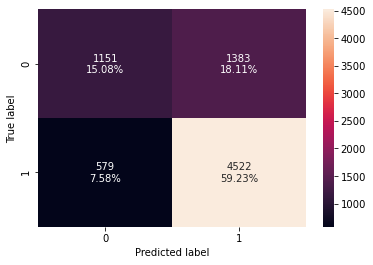

<IPython.core.display.Javascript object>

In [532]:
# Calculating different metrics
stacking_classifier_model_train_perf = model_performance_classification_sklearn(
    stacking_classifier, X_train, y_train
)
print("Training performance:\n", stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf = model_performance_classification_sklearn(
    stacking_classifier, X_test, y_test
)
print("Testing performance:\n", stacking_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier, X_test, y_test)

#### Comment: Stacking classifier has the best scores. 

##  Will tuning the hyperparameters improve the model performance?

It should but sometimes only one score get better bt the other scores get worse. I discuss it below.

## Model Performance Comparison and Conclusions

In [609]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree_model_train_perf.T,
        dtree_estimator_model_train_perf.T,
        dtree_estimatorb_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_estimator2_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_model_train_perf.T,
        abc_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gbc_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Small Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Default Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Small Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Default Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.711599,0.710645,0.996744,0.996744,0.985066,0.999944,0.740680,0.753930,0.757074,0.757186,0.831518,0.748428,0.795363
Recall,1.0,0.932605,0.730252,0.999496,0.999496,0.986134,1.000000,0.889496,0.880924,0.878739,0.874790,0.927899,0.921597,0.929916
Precision,1.0,0.719108,0.817190,0.995647,0.995647,0.991467,0.999916,0.762114,0.779463,0.783824,0.785957,0.837467,0.755563,0.797435
F1,1.0,0.812059,0.771279,0.997568,0.997568,0.988793,0.999958,0.820893,0.827094,0.828573,0.827998,0.880367,0.830362,0.858595
ROC-AUC,1.0,0.599675,0.700715,0.995350,0.995350,0.984525,0.999915,0.665316,0.689616,0.695459,0.697628,0.782708,0.660731,0.727221


<IPython.core.display.Javascript object>

### Comment 
Bagging classifier got bettter score after tuning. 
Adaboost tuned model has better Accuracy,Precision f1,ROC-AUC but slightly worse recall. Tuned gradient 
boost classifier has slightly better Accuracy, precision, ROC-AUC but worse f1 and recall. XGBoost after tuning got 
worse scores but there is less overfitting. Al of the yperparameter tuned models have no overfitting. 


In [549]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree_model_train_perf.T - dtree_model_test_perf.T,
        dtree_estimator_model_train_perf.T - dtree_estimator_model_test_perf.T,
        dtree_estimatorb_model_train_perf.T - dtree_estimatorb_model_test_perf.T,
        rf_estimator_model_train_perf.T - rf_estimator_model_test_perf.T,
        rf_estimator2_model_train_perf.T - rf_estimator2_model_test_perf.T,
        bagging_classifier_model_train_perf.T - bagging_classifier_model_test_perf.T,
        bagging_estimator_model_train_perf.T - bagging_estimator_model_test_perf.T,
        abc_model_train_perf.T - abc_model_test_perf.T,
        abc_tuned_model_train_perf.T - abc_tuned_model_test_perf.T,
        gbc_model_train_perf.T - gbc_model_test_perf.T,
        gbc_tuned_model_train_perf.T - gbc_tuned_model_test_perf.T,
        xgb_classifier_model_train_perf.T - xgb_classifier_model_test_perf.T,
        xgb_tuned_model_train_perf.T - xgb_tuned_model_test_perf.T,
        stacking_classifier_model_train_perf.T - stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Small Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Default Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison (difference in scores for train and test sets):")
models_train_comp_df

Training performance comparison (difference in scores for train and test sets):


,Decision Tree,Small Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Default Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.343287,0.002496,0.006650,0.265899,0.265899,0.285001,0.275779,0.005382,0.008154,0.009333,0.009445,0.098447,0.009594,0.052337
Recall,0.259557,0.003572,0.007649,0.147114,0.147114,0.207464,0.112527,0.011041,0.009331,0.011263,0.011234,0.070812,0.009227,0.043423
Precision,0.255617,0.000860,0.003683,0.226090,0.226090,0.217650,0.252763,0.000298,0.003818,0.004089,0.004236,0.067884,0.005039,0.031643
F1,0.257592,0.001904,0.005914,0.188713,0.188713,0.212557,0.188668,0.004904,0.006269,0.007303,0.007394,0.069385,0.006790,0.036861
ROC-AUC,0.385698,0.001970,0.006145,0.326065,0.326065,0.324274,0.358468,0.002529,0.007569,0.008366,0.008550,0.112452,0.009794,0.056863


<IPython.core.display.Javascript object>

### Conclusions: 
    
    1. Best model - XGbot hyperparameter tuned classifier is the best. As it was optional model - among the other models - stacking classifier is best (Highest f1score and smallest difference between train and test set scores).
    
    2. Hyperparameter tuning takes a long time. For XGBoost it improves to get less overfitting.
    
    3. All boosting methods have no overfitting and high scores. 
    
    4. Comparison and analysis of the importance of the features will be done below
    

# NOTE:  Boosting models are sensitive to outliers (decision trees are robust to outliers but boosting methods not) so I repeat the calculations after treating the outliers.

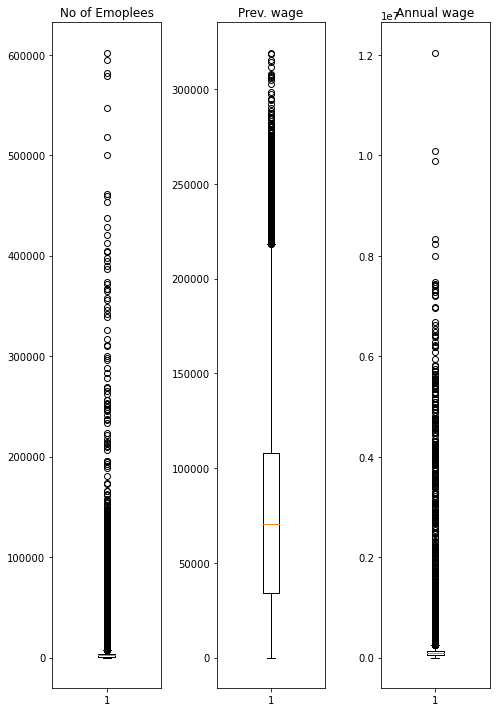

<IPython.core.display.Javascript object>

In [521]:
# let's plot the boxplots of all columns to check for outliers
plt.figure(figsize=(7, 10))

# for i, variable in enumerate(numeric_columns):
plt.subplot(1, 3, 1)
plt.boxplot(data["no_of_employees"], whis=1.5)
plt.tight_layout()
plt.title("No of Emoplees")
plt.subplot(1, 3, 2)
plt.boxplot(data["prevailing_wage"], whis=1.5)
plt.tight_layout()
plt.title("Prev. wage")
plt.subplot(1, 3, 3)
plt.boxplot(data["wage_fin"], whis=1.5)
plt.tight_layout()
plt.title("Annual wage")

plt.show()



In [522]:
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

<IPython.core.display.Javascript object>

In [523]:
outlier_col = [
    "wage_fin",
    "no_of_employees",
    "prevailing_wage",
]

<IPython.core.display.Javascript object>

In [524]:
dataout = treat_outliers_all(data, outlier_col)

<IPython.core.display.Javascript object>

In [525]:
dataout.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25447 entries, 0 to 25479
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   no_of_employees                    25447 non-null  float64 
 1   yr_of_estab                        25447 non-null  int64   
 2   prevailing_wage                    25447 non-null  float64 
 3   case_status                        25447 non-null  category
 4   wage_fin                           25447 non-null  float64 
 5   continent_Asia                     25447 non-null  uint8   
 6   continent_Europe                   25447 non-null  uint8   
 7   continent_North America            25447 non-null  uint8   
 8   continent_Oceania                  25447 non-null  uint8   
 9   continent_South America            25447 non-null  uint8   
 10  education_of_employee_Doctorate    25447 non-null  uint8   
 11  education_of_employee_High School  25447 

<IPython.core.display.Javascript object>

Now will split data into regularand small set. 

In [552]:
dfout2 = dataout.sample(frac=0.5)

<IPython.core.display.Javascript object>

In [555]:
Xto = dfout2.drop(["case_status"], axis=1)
yto = dfout2["case_status"].apply(lambda x: 1 if x == "Certified" else 0)


<IPython.core.display.Javascript object>

In [557]:
# Splitting data into training and test set:
X_traino2, X_testo2, y_traino2, y_testo2 = train_test_split(
    Xto, yto, test_size=0.3, random_state=1
)
print(X_traino2.shape, X_testo2.shape)

(8906, 22) (3818, 22)


<IPython.core.display.Javascript object>

In [561]:
Xo = dataout.drop(["case_status"], axis=1)
yo = dataout["case_status"].apply(lambda x: 1 if x == "Certified" else 0)


<IPython.core.display.Javascript object>

In [562]:
# Splitting data into training and test set:
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    Xo, yo, test_size=0.3, random_state=1, stratify=y
)
print(X_train3.shape, X_test3.shape)

(17812, 22) (7635, 22)


<IPython.core.display.Javascript object>

In [563]:
print(y.value_counts(1))
print(y_test.value_counts(1))

1    0.668094
0    0.331906
Name: case_status, dtype: float64
1    0.668107
0    0.331893
Name: case_status, dtype: float64


<IPython.core.display.Javascript object>

## I will now repeat calculations for bossting methods and random forest using the same methodology as before (hyperparameter tunig using smaller set of 50% ofrandomly selected rows.)  

# Random Forest trained on set without outliers

Training performance:
    Accuracy  Recall  Precision   F1  ROC-AUC
0       1.0     1.0        1.0  1.0      1.0
Testing performance:
    Accuracy    Recall  Precision        F1   ROC-AUC
0  0.725213  0.837679   0.770882  0.802894  0.668247


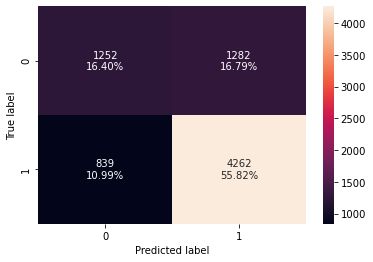

<IPython.core.display.Javascript object>

In [566]:

# Fitting the model
rfo_estimator = RandomForestClassifier(random_state=1)
rfo_estimator.fit(X_train3, y_train3)

# Calculating different metrics
rfo_estimator_model_train_perf = model_performance_classification_sklearn(
    rfo_estimator, X_train3, y_train3
)
print("Training performance:\n", rfo_estimator_model_train_perf)
rfo_estimator_model_test_perf = model_performance_classification_sklearn(
    rf_estimator, X_test3, y_test3
)
print("Testing performance:\n", rfo_estimator_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(rfo_estimator, X_test3, y_test3)


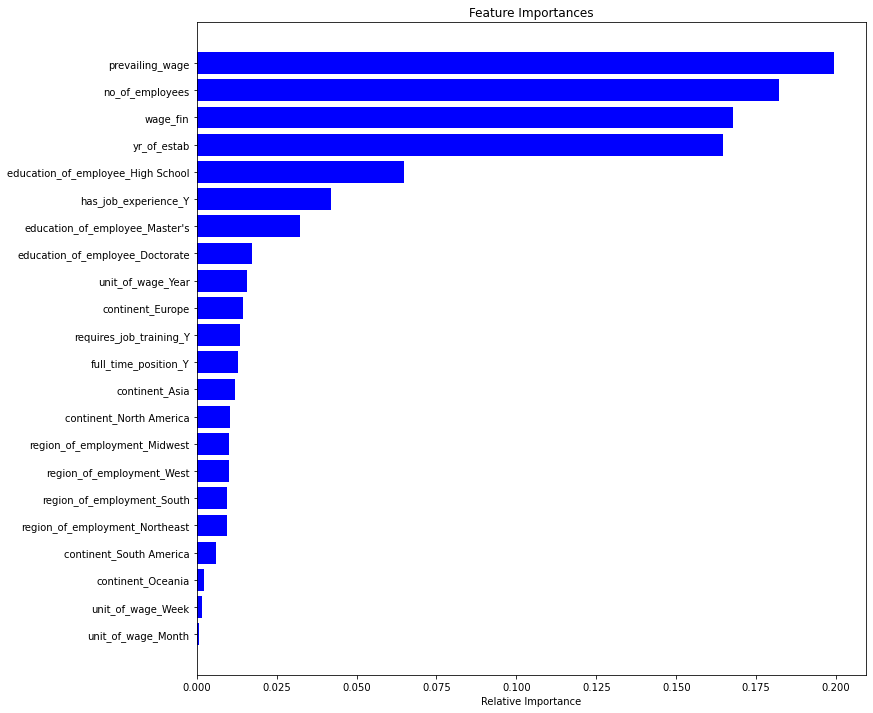

                                        Imp
prevailing_wage                    0.199470
no_of_employees                    0.182056
wage_fin                           0.167686
yr_of_estab                        0.164492
education_of_employee_High School  0.064920
has_job_experience_Y               0.042031
education_of_employee_Master's     0.032433
education_of_employee_Doctorate    0.017281
unit_of_wage_Year                  0.015607
continent_Europe                   0.014516
requires_job_training_Y            0.013485
full_time_position_Y               0.012979
continent_Asia                     0.012001
continent_North America            0.010399
region_of_employment_Midwest       0.010250
region_of_employment_West          0.010235
region_of_employment_South         0.009597
region_of_employment_Northeast     0.009435
continent_South America            0.006154
continent_Oceania                  0.002361
unit_of_wage_Week                  0.001745
unit_of_wage_Month              

<IPython.core.display.Javascript object>

In [567]:
importances = rfo_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


print(
    pd.DataFrame(
        rfo_estimator.feature_importances_, columns=["Imp"], index=X_train3.columns
    ).sort_values(by="Imp", ascending=False)
)

Comment: Overfitted model.Among the most important features it has features related to employer.

# Random Forest hyperparameter tuning 

In [571]:
# Choose the type of classifier.
rfo_estimator2 = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [110, 200],
    "max_features": [0.7, 0.9, "log2", "auto"],
    "max_samples": [0.7, 0.9, None],
}

# Run the grid search
grid_obj = GridSearchCV(rfo_estimator2, parameters, scoring="f1", cv=5)
grid_obj = grid_obj.fit(X_traino2, y_traino2)

# Set the clf to the best combination of parameters
rfo_estimator2 = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rfo_estimator2.fit(X_train3, y_train3)

RandomForestClassifier(max_features='log2', max_samples=0.7, n_estimators=200,
                       random_state=1)

<IPython.core.display.Javascript object>

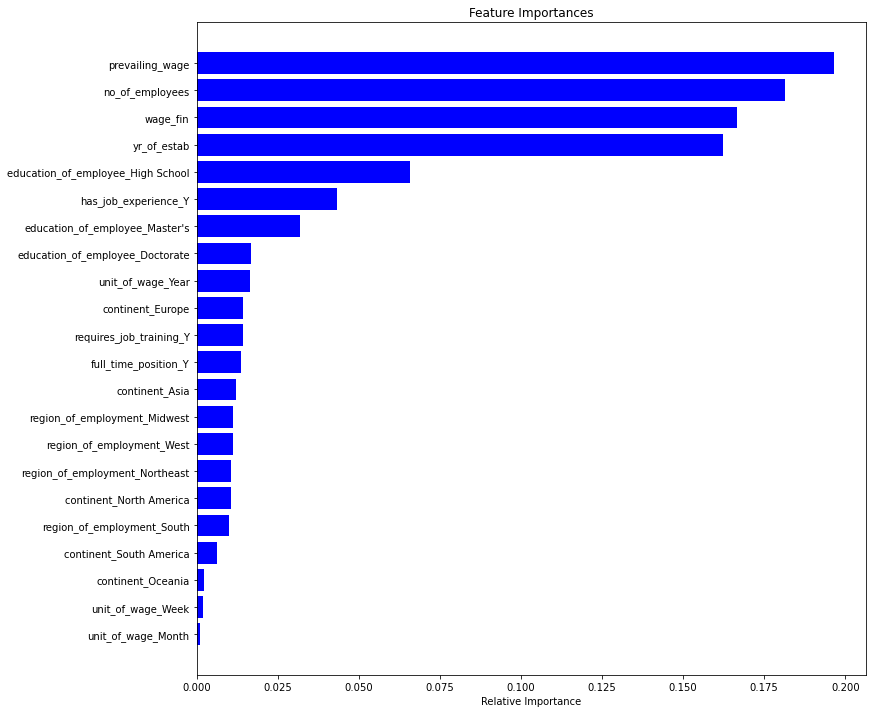

                                        Imp
prevailing_wage                    0.196656
no_of_employees                    0.181486
wage_fin                           0.166764
yr_of_estab                        0.162175
education_of_employee_High School  0.065772
has_job_experience_Y               0.043131
education_of_employee_Master's     0.031854
education_of_employee_Doctorate    0.016770
unit_of_wage_Year                  0.016354
continent_Europe                   0.014173
requires_job_training_Y            0.014157
full_time_position_Y               0.013511
continent_Asia                     0.012134
region_of_employment_Midwest       0.011262
region_of_employment_West          0.011054
region_of_employment_Northeast     0.010599
continent_North America            0.010499
region_of_employment_South         0.010101
continent_South America            0.006216
continent_Oceania                  0.002282
unit_of_wage_Week                  0.002028
unit_of_wage_Month              

<IPython.core.display.Javascript object>

In [600]:
importances = rfo_estimator2.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


print(
    pd.DataFrame(
        rfo_estimator2.feature_importances_, columns=["Imp"], index=X_train3.columns
    ).sort_values(by="Imp", ascending=False)
)

Training performance 
    Accuracy    Recall  Precision        F1   ROC-AUC
0  0.996575  0.999664   0.995231  0.997443  0.995011
Testing performance 
    Accuracy    Recall  Precision        F1   ROC-AUC
0  0.732417  0.850225   0.772258  0.809368  0.672745


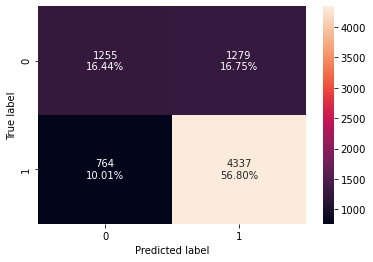

<IPython.core.display.Javascript object>

In [601]:
confusion_matrix_sklearn(rfo_estimator2, X_test3, y_test3)
rfo_estimator2_model_train_perf = model_performance_classification_sklearn(
    rfo_estimator2, X_train3, y_train3
)
print("Training performance \n", rfo_estimator2_model_train_perf)

rfo_estimator2_model_test_perf = model_performance_classification_sklearn(
    rfo_estimator2, X_test3, y_test3
)
print("Testing performance \n", rfo_estimator2_model_test_perf)



Comment: Model still is overfitting. 

# Adaboost classifier

Training performance 
    Accuracy    Recall  Precision        F1   ROC-AUC
0  0.739501  0.888908   0.761226  0.820127  0.663838
Testing performance 
    Accuracy    Recall  Precision        F1   ROC-AUC
0  0.734643  0.878455   0.761169  0.815617  0.661801


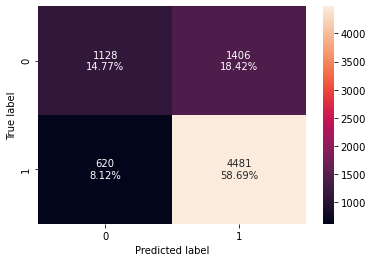

<IPython.core.display.Javascript object>

In [573]:
abco = AdaBoostClassifier(random_state=1)
abco.fit(X_train3, y_train3)
abco_model_train_perf = model_performance_classification_sklearn(
    abco, X_train3, y_train3
)
print("Training performance \n", abco_model_train_perf)
abco_model_test_perf = model_performance_classification_sklearn(abco, X_test3, y_test3)
print("Testing performance \n", abco_model_test_perf)
confusion_matrix_sklearn(abco, X_test3, y_test3)

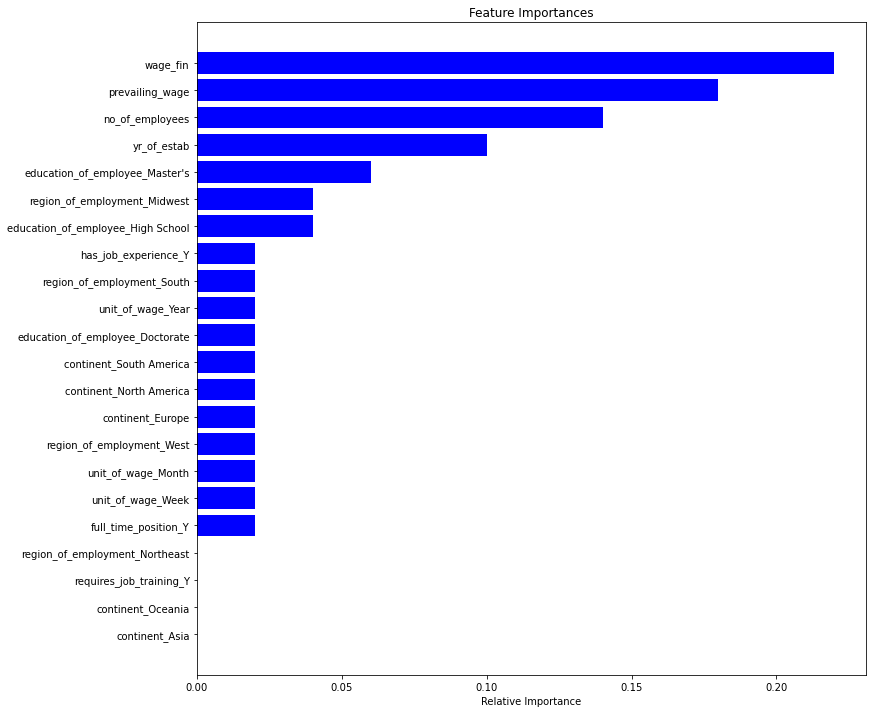

                                    Imp
wage_fin                           0.22
prevailing_wage                    0.18
no_of_employees                    0.14
yr_of_estab                        0.10
education_of_employee_Master's     0.06
region_of_employment_Midwest       0.04
education_of_employee_High School  0.04
continent_Europe                   0.02
unit_of_wage_Year                  0.02
unit_of_wage_Week                  0.02
unit_of_wage_Month                 0.02
region_of_employment_West          0.02
region_of_employment_South         0.02
full_time_position_Y               0.02
continent_North America            0.02
has_job_experience_Y               0.02
education_of_employee_Doctorate    0.02
continent_South America            0.02
region_of_employment_Northeast     0.00
continent_Asia                     0.00
continent_Oceania                  0.00
requires_job_training_Y            0.00


<IPython.core.display.Javascript object>

In [602]:
importances = abco.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


print(
    pd.DataFrame(
        abco.feature_importances_, columns=["Imp"], index=X_train3.columns
    ).sort_values(by="Imp", ascending=False)
)




Comment: No overfitting and very good scores.

# Adaboost hyperparameter tuning

In [577]:
# Choose the type of classifier.
abco_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1),
        DecisionTreeClassifier(max_depth=2),
        DecisionTreeClassifier(max_depth=3),
    ],
    "n_estimators": np.arange(10, 90, 10),
    "learning_rate": np.arange(0.1, 2, 0.1),
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_traino2, y_traino2)

# Set the clf to the best combination of parameters
abco_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abco_tuned.fit(X_train3, y_train3)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.2, n_estimators=30, random_state=1)

<IPython.core.display.Javascript object>

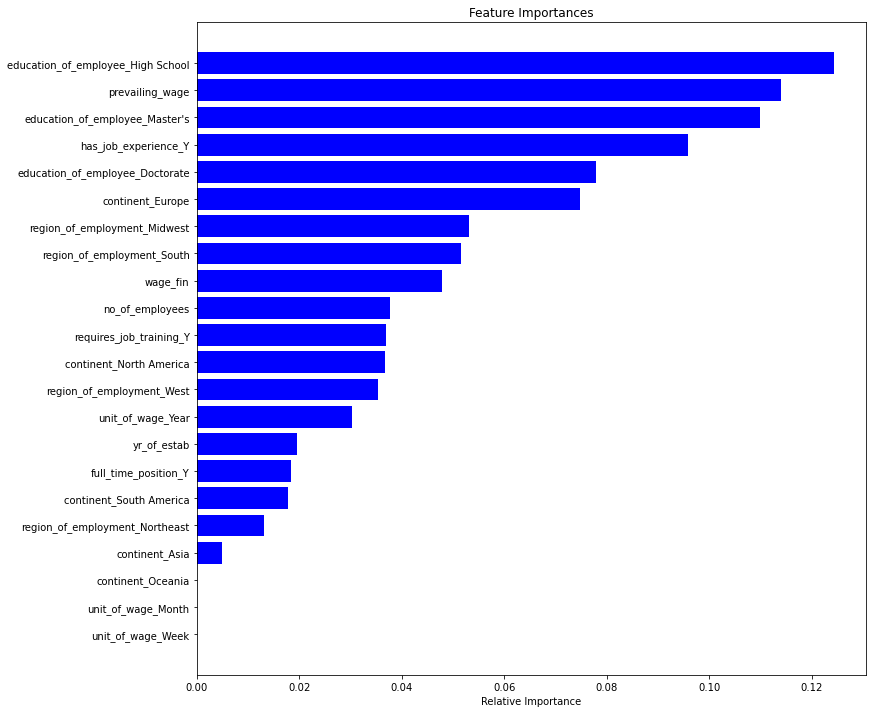

                                        Imp
education_of_employee_High School  0.124391
prevailing_wage                    0.114012
education_of_employee_Master's     0.109825
has_job_experience_Y               0.095754
education_of_employee_Doctorate    0.077983
continent_Europe                   0.074818
region_of_employment_Midwest       0.053033
region_of_employment_South         0.051484
wage_fin                           0.047754
no_of_employees                    0.037644
requires_job_training_Y            0.036840
continent_North America            0.036743
region_of_employment_West          0.035409
unit_of_wage_Year                  0.030259
yr_of_estab                        0.019521
full_time_position_Y               0.018456
continent_South America            0.017827
region_of_employment_Northeast     0.013223
continent_Asia                     0.005025
continent_Oceania                  0.000000
unit_of_wage_Month                 0.000000
unit_of_wage_Week               

<IPython.core.display.Javascript object>

In [603]:
importances = abco_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

print(
    pd.DataFrame(
        abco_tuned.feature_importances_, columns=["Imp"], index=X_train3.columns
    ).sort_values(by="Imp", ascending=False)
)

Training performance 
    Accuracy    Recall  Precision        F1   ROC-AUC
0  0.753537  0.879916   0.779556  0.826701  0.689535
Testing performance 
    Accuracy    Recall  Precision        F1   ROC-AUC
0  0.747217  0.870614   0.777622  0.821495  0.684715


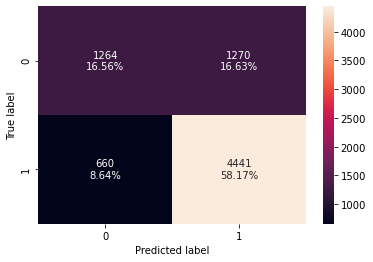

<IPython.core.display.Javascript object>

In [604]:
confusion_matrix_sklearn(abco_tuned, X_test3, y_test3)
abco_tuned_model_train_perf = model_performance_classification_sklearn(
    abco_tuned, X_train3, y_train3
)
print("Training performance \n", abco_tuned_model_train_perf)

abco_tuned_model_test_perf = model_performance_classification_sklearn(
    abco_tuned, X_test3, y_test3
)
print("Testing performance \n", abco_tuned_model_test_perf)



Comment: Hypertuning improved the model.

# Gradient Boost Classsfier

Training performance 
    Accuracy    Recall  Precision        F1   ROC-AUC
0  0.756793  0.877815   0.783999  0.828259  0.695504
Training performance 
    Accuracy    Recall  Precision        F1   ROC-AUC
0  0.748003  0.866693   0.780406  0.821289  0.687885


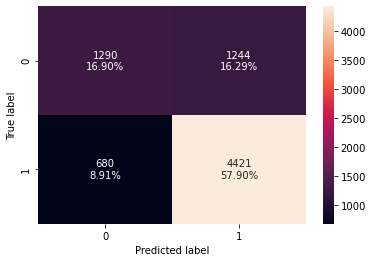

<IPython.core.display.Javascript object>

In [579]:
gbco = GradientBoostingClassifier(random_state=1)
gbco.fit(X_train3, y_train3)

gbco_model_train_perf = model_performance_classification_sklearn(gbco, X_train3, y_train3)
print("Training performance \n", gbco_model_train_perf)
gbco_model_test_perf = model_performance_classification_sklearn(gbco, X_test3, y_test3)
print("Training performance \n", gbco_model_test_perf)
confusion_matrix_sklearn(gbco, X_test3, y_test3)


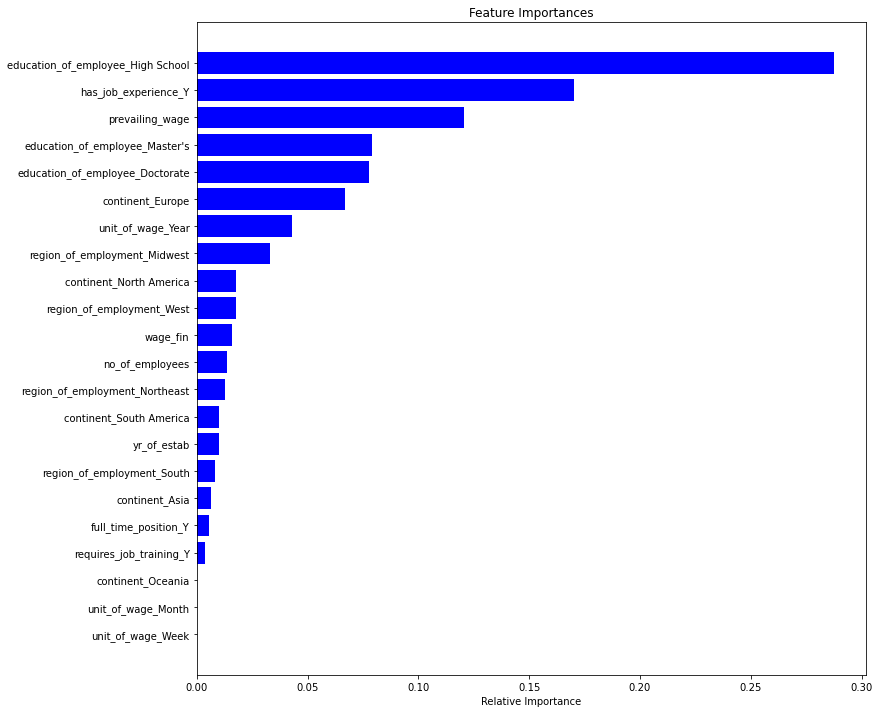

                                        Imp
education_of_employee_High School  0.287774
has_job_experience_Y               0.170420
prevailing_wage                    0.120551
education_of_employee_Master's     0.079260
education_of_employee_Doctorate    0.077550
continent_Europe                   0.066805
unit_of_wage_Year                  0.042897
region_of_employment_Midwest       0.032886
continent_North America            0.017660
region_of_employment_West          0.017597
wage_fin                           0.015804
no_of_employees                    0.013685
region_of_employment_Northeast     0.012795
continent_South America            0.010070
yr_of_estab                        0.009880
region_of_employment_South         0.008210
continent_Asia                     0.006381
full_time_position_Y               0.005769
requires_job_training_Y            0.003839
continent_Oceania                  0.000166
unit_of_wage_Month                 0.000000
unit_of_wage_Week               

<IPython.core.display.Javascript object>

In [590]:
importances = gbco.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


print(
    pd.DataFrame(
        gbco.feature_importances_, columns=["Imp"], index=X_train3.columns
    ).sort_values(by="Imp", ascending=False)
)


Comment: Treatment of outliers did not change much. 

# Gradient Boost hyperparameter tuning

In [583]:
# Choose the type of classifier.
gbco_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100, 150, 200],
    "subsample": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_traino2, y_traino2)

# Set the clf to the best combination of parameters
gbco_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbco_tuned.fit(X_train3, y_train3)


GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=1, n_estimators=200, random_state=1,
                           subsample=1)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy    Recall  Precision       F1   ROC-AUC
0  0.748989  0.892773   0.768797  0.82616  0.676173
Testing performance:
    Accuracy    Recall  Precision        F1   ROC-AUC
0  0.743157  0.880808    0.76856  0.820864  0.673435


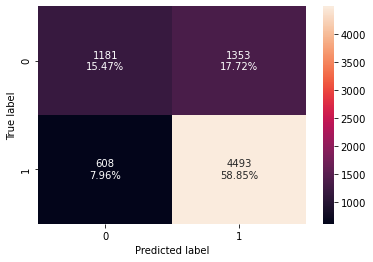

<IPython.core.display.Javascript object>

In [584]:
# Calculating different metrics
gbco_tuned_model_train_perf = model_performance_classification_sklearn(
    gbco_tuned, X_train3, y_train3
)
print("Training performance:\n", gbco_tuned_model_train_perf)
gbco_tuned_model_test_perf = model_performance_classification_sklearn(
    gbco_tuned, X_test3, y_test3
)
print("Testing performance:\n", gbco_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(gbco_tuned, X_test3, y_test3)

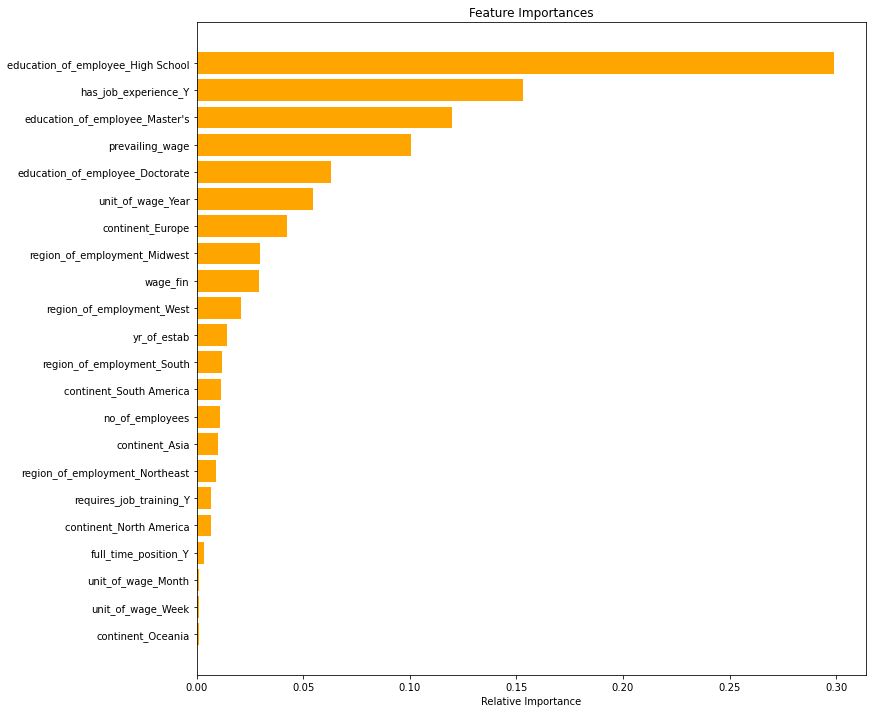

<IPython.core.display.Javascript object>

In [585]:
importances = gbco_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="orange", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [589]:
print(
    pd.DataFrame(
        gbco_tuned.feature_importances_, columns=["Imp"], index=X_train3.columns
    ).sort_values(by="Imp", ascending=False)
)

                                        Imp
education_of_employee_High School  0.299149
has_job_experience_Y               0.153034
education_of_employee_Master's     0.119852
prevailing_wage                    0.100719
education_of_employee_Doctorate    0.063074
unit_of_wage_Year                  0.054766
continent_Europe                   0.042207
region_of_employment_Midwest       0.029607
wage_fin                           0.029068
region_of_employment_West          0.020811
yr_of_estab                        0.013995
region_of_employment_South         0.012097
continent_South America            0.011179
no_of_employees                    0.011133
continent_Asia                     0.010068
region_of_employment_Northeast     0.008952
requires_job_training_Y            0.006843
continent_North America            0.006627
full_time_position_Y               0.003558
unit_of_wage_Month                 0.001226
unit_of_wage_Week                  0.001080
continent_Oceania               

<IPython.core.display.Javascript object>

In [ ]:
Comment: very good model,litle overfitting,high scores. 

# XGBoost hyperparameter tuning 

In [586]:
# Choose the type of classifier.
xgbo_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10, 30, 50],
    "scale_pos_weight": [1, 2, 5],
    "subsample": [0.7, 0.9, 1],
    "learning_rate": [0.05, 0.1, 0.2],
    "colsample_bytree": [0.7, 0.9, 1],
    "colsample_bylevel": [0.5, 0.7, 1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgbo_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_traino2, y_traino2)

# Set the clf to the best combination of parameters
xgbo_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgbo_tuned.fit(X_train3, y_train3)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, eval_metric='logloss', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=12, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy    Recall  Precision        F1   ROC-AUC
0  0.746912  0.920588   0.754581  0.829359  0.658958
Testing performance:
    Accuracy    Recall  Precision        F1   ROC-AUC
0  0.736739  0.911194   0.749073  0.822218  0.648375


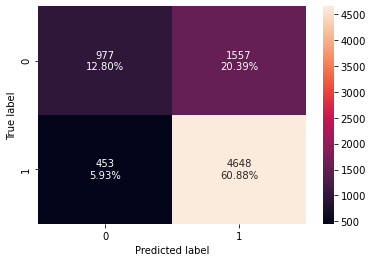

<IPython.core.display.Javascript object>

In [587]:
# Calculating different metrics
xgbo_tuned_model_train_perf = model_performance_classification_sklearn(
    xgb_tuned, X_train3, y_train3
)
print("Training performance:\n", xgbo_tuned_model_train_perf)
xgbo_tuned_model_test_perf = model_performance_classification_sklearn(
    xgbo_tuned, X_test3, y_test3
)
print("Testing performance:\n", xgbo_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(xgbo_tuned, X_test3, y_test3)

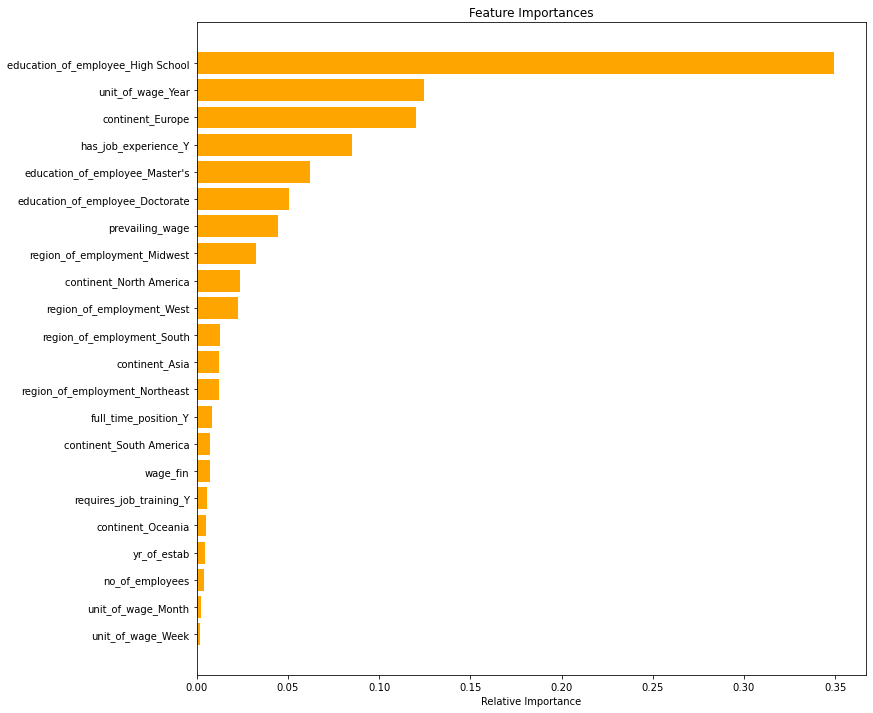

<IPython.core.display.Javascript object>

In [588]:
importances = xgbo_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="orange", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [596]:
print(
    pd.DataFrame(
        xgbo_tuned.feature_importances_, columns=["Imp"], index=X_train3.columns
    ).sort_values(by="Imp", ascending=False)
)

                                        Imp
education_of_employee_High School  0.349622
unit_of_wage_Year                  0.124796
continent_Europe                   0.120413
has_job_experience_Y               0.084871
education_of_employee_Master's     0.061952
education_of_employee_Doctorate    0.050681
prevailing_wage                    0.044644
region_of_employment_Midwest       0.032667
continent_North America            0.023840
region_of_employment_West          0.022704
region_of_employment_South         0.012706
continent_Asia                     0.012331
region_of_employment_Northeast     0.012095
full_time_position_Y               0.008238
continent_South America            0.007293
wage_fin                           0.007264
requires_job_training_Y            0.005489
continent_Oceania                  0.005371
yr_of_estab                        0.004671
no_of_employees                    0.004134
unit_of_wage_Month                 0.002208
unit_of_wage_Week               

<IPython.core.display.Javascript object>

In [ ]:
Comment:

# Stacking model

In [597]:
estimators = [
    ("Random Forest", rfo_estimator2),
    ("Gradient Boosting", gbco_tuned),
    ("Decision Tree", dtree_estimator),
]

final_estimator = xgbo_tuned

stacking_classifiero = StackingClassifier(
    estimators=estimators, final_estimator=final_estimator
)

stacking_classifiero.fit(X_train3, y_train3)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(max_features='log2',
                                                       max_samples=0.7,
                                                       n_estimators=200,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=1,
                                                           n_estimators=200,
                                                           random_state=1,
                                                           subsample=1)),
                               ('Decision Tree',
                                DecisionTreeClassifier(class_weight={0: 0.67,
                                                                     1:...
 

<IPython.core.display.Javascript object>

Training performance:
    Accuracy    Recall  Precision        F1   ROC-AUC
0  0.783741  0.932857   0.784301  0.852153  0.708225
Testing performance:
    Accuracy    Recall  Precision        F1   ROC-AUC
0  0.741454  0.876103   0.769059  0.819098  0.673253


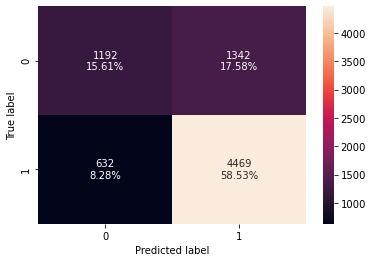

<IPython.core.display.Javascript object>

In [598]:
# Calculating different metrics
stacking_classifiero_model_train_perf = model_performance_classification_sklearn(
    stacking_classifiero, X_train3, y_train3
)
print("Training performance:\n", stacking_classifiero_model_train_perf)
stacking_classifiero_model_test_perf = model_performance_classification_sklearn(
    stacking_classifiero, X_test3, y_test3
)
print("Testing performance:\n", stacking_classifiero_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(stacking_classifiero, X_test3, y_test3)

In [608]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        rfo_estimator_model_train_perf.T,
        rfo_estimator2_model_train_perf.T,
        abco_model_train_perf.T,
        abco_tuned_model_train_perf.T,
        gbco_model_train_perf.T,
        gbco_tuned_model_train_perf.T,
        xgbo_tuned_model_train_perf.T,
        stacking_classifiero_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparisonfor set with treated outliers:")
models_train_comp_df

Training performance comparisonfor set with treated outliers:


,Random Forest Estimator,Random Forest Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.996575,0.739501,0.753537,0.756793,0.748989,0.746912,0.783741
Recall,1.0,0.999664,0.888908,0.879916,0.877815,0.892773,0.920588,0.932857
Precision,1.0,0.995231,0.761226,0.779556,0.783999,0.768797,0.754581,0.784301
F1,1.0,0.997443,0.820127,0.826701,0.828259,0.826160,0.829359,0.852153
ROC-AUC,1.0,0.995011,0.663838,0.689535,0.695504,0.676173,0.658958,0.708225


<IPython.core.display.Javascript object>

The best is stacking classifier,after that XGBoost tuned model.

Effect of hyperparameter tuning:

    1) Random forest has lower scores and only minimally less overfitted
    
    2) Adaboost Classifier after hyperparameter tuning has allscores better except recall (minimally worse)
    
    4)Gradient Boost after hyperparameter tuning has better recall but other scores are worse

In [607]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        rfo_estimator_model_train_perf.T - rfo_estimator_model_test_perf.T,
        rfo_estimator2_model_train_perf.T - rfo_estimator2_model_test_perf.T,
        abco_model_train_perf.T - abco_model_test_perf.T,
        abco_tuned_model_train_perf.T - abco_tuned_model_test_perf.T,
        gbco_model_train_perf.T - gbco_model_test_perf.T,
        gbco_tuned_model_train_perf.T - gbco_tuned_model_test_perf.T,
        xgbo_tuned_model_train_perf.T - xgbo_tuned_model_test_perf.T,
        stacking_classifiero_model_train_perf.T
        - stacking_classifiero_model_test_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print(
    "Training performance comparison for treated outliers (difference in scores for train and test sets):"
)
models_train_comp_df

Training performance comparison for treated outliers (difference in scores for train and test sets):


,Random Forest Estimator,Random Forest Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.274787,0.264159,0.004858,0.006320,0.008791,0.005833,0.010173,0.042287
Recall,0.162321,0.149438,0.010452,0.009302,0.011122,0.011965,0.009394,0.056754
Precision,0.229118,0.222973,0.000058,0.001934,0.003593,0.000237,0.005507,0.015243
F1,0.197106,0.188074,0.004510,0.005207,0.006970,0.005295,0.007140,0.033055
ROC-AUC,0.331753,0.322266,0.002037,0.004820,0.007620,0.002739,0.010583,0.034972


<IPython.core.display.Javascript object>

### Comment: Again stacking classifier performed best

## Analysis of  features importance (in order of decreasing importance listed for each model)

Random forest:       prevailing_wage, no_of_employees,wage_final,yr_of_estab,education_of_employee_High School
    
Random forest tuned: prevailing_wage,no_of_employees,wage_final,yr_of_estab,education_of_employee_High School
    
Adaboost Classifier:      wage_final,prevailing_wage,no_of_employees,yr_of_estab,education_of_employee_Master
    
Adabosst Classifier Tuned: education_of_employee_High School,prevailing_wage, education_of_employee_Master, 
    has_job_experience_Y,education_of_employee_Doctorate   

Gradient Boost Classifier:
    education_of_employee_High School,has_job_experience_Y,prevailing_wage,education_of_employee_Master,
    education_of_employee_Doctorate,continent_Europe 
    
Gradient Boost Classifier Tuned:
    education_of_employee_High School,has_job_experience_Y,education_of_employee_Master,prevailing_wage,
    education_of_employee_Doctorate,unit_of_wage_Year 

XGBoost Classifier Tuned: education_of_employee_High School,unit_of_wage_Year,continent_Europe,has_job_experience_Y,
    education_of_employee_Master,education_of_employee_Doctorate   

### Conclusions:

1)Random forest models have the same order ofimprtance for features, with prevailing wage as most impatful.

2) Adaboost - tuning has effect on the relative importance of the features. After hyperparameter tuning the most important is education at High School level.

3)All the other methods has also asmost important education at High School level.  

4) Other important fetures is job experience,Master or PhD,annual wage,application from Europe,prevailing wage, no ofemployees and year ofbusines established.

5) Treatment of outliers has increased the score for stacking classifier f1-score from 0.83 to 0.85. For other methods the change was minimal.

# Actionable Insights and Recommendations

1) year-of-estab is feature highly multicoliear so shouldbe considered with caution. 
The ensamble methods are not sensitive to multicolinearity but if we want to discuss feature importance one has to be careful.

2) Becaue many High school graduate's applications for visa are denied, it is one of the most important feature for classification. It should be undertood why that is the case. For example prevailing wage and annual wage are 2 other features that are important if visa is certified or denied. It might be that the jobs for High School graduates are paid weekly or hourly.

3)Master and PhD degrees has lower percentage of denied visas so the clasification model has this type of educaiotn as 
important.

4) Visa applicants from Europe are more likely to have visa certified

5) another factor that in some models was more important for certified visa was job at Midwest region

6) It is important what company the applicant will work - both the number of employees and the year of estabcome out as imprtant features forseveral models